# **Credit Scoring DataSet Description**


| Feature Name  | Description                                                                         |
| ------------- | ----------------------------------------------------------------------------------- |
| **Checking**  | Status of checking account (proxy for liquidity).                                   |
| **Duration**  | Loan duration in months.                                                            |
| **History**   | Credit history (past payment behavior).                                             |
| **Purpose**   | Purpose of the loan (car, furniture, education, etc.).                              |
| **Amount**    | Loan amount requested.                                                              |
| **Savings**   | Savings account/balance status.                                                     |
| **Employed**  | Years employed (proxy for job stability).                                           |
| **Installp**  | Installment rate as a percentage of income (debt-to-income ratio).                  |
| **Marital**   | gender and status                                                                   |
| **Coapp**     | Presence of co-applicant or guarantor.                                              |
| **Resident**  | Years at current residence.                                                         |
| **Property**  | Type of property owned                                                              |
| **Age**       | Applicant’s age.                                                                    |
| **Other**     | Other installment plans (e.g., bank, stores, ...).                                  |
| **Housing**   | Housing status (own, rent, free).                                                   |
| **Existcr**   | Number of existing credits at this bank.                                            |
| **Job**       | Job type (unskilled, skilled, management, unemployed).                              |
| **Depends**   | Number of dependents.                                                               |
| **Telephone** | Whether the applicant has a telephone.                                              |
| **Foreign**   | Whether the applicant is a foreign worker.                                          |
| **Class**     | Target variable: 1 = good credit (creditworthy), 0 = bad credit (not creditworthy). |


# **Libraries**


In [559]:
# Pandas : Data Manipulation
import pandas as pd


# NumPy : Math
import numpy as np
import math


# MatPlotLib
import matplotlib
from matplotlib import style

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import skew


# Missing Value Imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


# handle imbalanced datasets
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline


# additional preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline


# Additional Metrics
from sklearn.metrics import log_loss, balanced_accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error


# Additional Statistical & Utility Imports
from scipy import stats
from scipy.stats import norm, boxcox
import warnings
warnings.filterwarnings('ignore')


# Spliting
from sklearn.model_selection import train_test_split


# Scaling
from sklearn.preprocessing import RobustScaler , MinMaxScaler , StandardScaler


# Encoding
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# from category_encoders import OneHotEncoder,BinaryEncoder


# Correlation
# Feature Selection : Categorical
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


# Feature Selection : Numerical
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

# Feature Selection : Recursive Feature Elimination
from sklearn.feature_selection import RFE

# Advanced Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE


# Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import RandomizedSearchCV


# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


# regressors
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


# classifiers & regressors
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
# import lightgbm as lgb
# from lightgbm import LGBMClassifier, LGBMRegressor
# from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import StackingClassifier, StackingRegressor


# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


# classification
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score , accuracy_score
from sklearn.metrics import confusion_matrix , classification_report


# regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# unsupervised
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score , adjusted_rand_score


# handle overfitting
from sklearn.linear_model import Ridge, Lasso


# Utility for saving models
import joblib
import pickle

# **Class**


In [560]:
class MachineLearning:

  def data_information (self , data_frame):

    """
        Steps of understanding data to build the model ?

          Analysis :
            - plots of data frame for categorical & numerical
            - Some Math -> describe()

          Preprocessing :
            - Names of columns
            - Data types -> info() or here
            - nulls
            - duplicates
            - unique (num & values)
            - mean & median & mode : -> describe()
            - outliers -> box plot & math ( describe() )


    """


    """
        Just to know the information of each column.
        I get each name of it.
        Also each data type.
    """
    name_of_each_column = [col for col in data_frame]
    data_types_of_each_column = [data_frame[col].dtype for col in data_frame.columns]


    """
        Number of null values in each column is not enough to know if it is huge or not.
        I need to calculate the percentage of it based on length of data frame to make it clear.
    """
    null_values_of_each_column = [data_frame[col].isnull().sum() for col in data_frame.columns]
    percentage_of_null_values_of_each_column = [data_frame[col].isnull().sum() / len(data_frame) * 100 for col in data_frame.columns]


    """
        Unique values make me know :

          - What are the exact values of each column ?
          - Column is categorical or numerical ?

    """
    num_of_unique_values_of_each_column = [data_frame[col].nunique() for col in data_frame.columns]
    unique_values_of_each_column = [data_frame[col].unique() for col in data_frame.columns]


    """
        What are the num of duplicates in data frame ?
    """
    duplicates = data_frame.duplicated().sum()



    information_of_data = pd.DataFrame(
        {
            'Names' : name_of_each_column ,
            'Values' : unique_values_of_each_column ,
            'Data Type' : data_types_of_each_column ,
            'Unique Num' : num_of_unique_values_of_each_column ,
            'Null Num' : null_values_of_each_column ,
            'Null Percentage' : percentage_of_null_values_of_each_column ,
            'Duplicates' : duplicates
        }
    )

    return information_of_data
  
  
  def bar_plot(self , column , data_frame):
    sns.set_style("whitegrid")
    surviver_counts = data_frame[column].value_counts(normalize=True)*100

    plt.figure(figsize=(6, 6))
    ax = sns.barplot(x=surviver_counts.index, y=data_frame[column].value_counts(), palette="rocket")

    plt.title(f"Percentage of {column} and Non-{column}", fontsize=14, fontweight='bold')
    plt.xlabel(f"{column} Status", fontsize=12, fontweight='bold')
    plt.ylabel("Count", fontsize=12, fontweight='bold')

    for p, percentage in zip(ax.patches, surviver_counts.values):
      ax.annotate(f'{percentage:.1f}%',
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='bottom',
                  fontsize=12, fontweight='bold', color='black')
    plt.show()
  
  
  def histogram_plot(self , column , data_frame):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))

    skewness = skew(data_frame[column], nan_policy="omit")
    sns.histplot(data_frame[column], bins=50, kde=True, color="navy", edgecolor="black")

    plt.xlabel(column, fontsize=14, fontweight='bold')
    plt.ylabel("Frequency", fontsize=14, fontweight='bold')
    plt.title(f"Distribution of {column}", fontsize=16, fontweight='bold')

    plt.text(
        x=data_frame[column].max() * 0.7,
        y=plt.gca().get_ylim()[1] * 0.7,
        s=f"Skewness: {skewness:.2f}",
        fontsize=15, fontweight="bold", color="navy"
    )

    plt.show()
  
  
  def strip_plot(self , column_x , column_y , data_frame):
    plt.figure(figsize=(10, 6))
    sns.stripplot(x=data_frame[column_x], y=data_frame[column_y], jitter=True, alpha=0.7, palette=["#1f77b4", "#ff7f0e"])
    plt.xlabel(column_x, fontsize=14, fontweight="bold")
    plt.ylabel(column_y, fontsize=14, fontweight="bold")
    plt.title(f"Strip Plot of {column_y} by {column_x}", fontsize=16, fontweight="bold")
    plt.show()
  
  
  def pie_chart(self , column , data_frame):
    satisfaction_counts = data_frame[column].value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(satisfaction_counts,
            labels=satisfaction_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Dark2.colors)

    plt.title(f"Distribution of {column}")
    plt.axis('equal')
    plt.show()
  
  
  def box_plot(self , column_x , column_y , data_frame):
    plt.figure(figsize=(10,5))
    sns.boxplot(x = column_x, y = column_y, data = data_frame, palette="rocket")

    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.title(f'Box Plot of {column_y} by {column_x}')
    plt.show()
  
  
  def count_plot(self , column , hue , data_frame):
    ax = sns.countplot(x = column , data=data_frame, palette='rocket',hue=hue)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2, height,
                    f'{height/len(data_frame)*100:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Count of {column} with {hue} Status')
    plt.show()
  
  
  def scatter_plot(self, x, y, hue, data_frame):
    ax = sns.scatterplot(x=x, y=y, data=data_frame, hue=hue, palette='rocket')
    plt.title(f'Scatter plot of {x} vs {y} by {hue}')
    plt.show()


  def heatmap(self, data_frame):
        corr = data_frame.corr()
        ax = sns.heatmap(corr, annot=True, cmap="rocket", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()


  def violin_plot(self, x, y, hue, data_frame):
        ax = sns.violinplot(x=x, y=y, data=data_frame, hue=hue, palette='rocket', split=True)
        plt.title(f'Violin plot of {y} across {x} grouped by {hue}')
        plt.show()


  def swarm_plot(self, x, y, hue, data_frame):
        sns.swarmplot(x=x, y=y, data=data_frame, hue=hue, palette='rocket', dodge=True)
        plt.title(f'Swarm plot of {y} across {x} grouped by {hue}')
        plt.show()


  def kde_plot(self, column, hue, data_frame):
        sns.kdeplot(data=data_frame, x=column, hue=hue, fill=True, palette='rocket')
        plt.title(f'KDE plot of {column} by {hue}')
        plt.show()


  def line_plot(self, x, y, hue, data_frame):
        sns.lineplot(x=x, y=y, data=data_frame, hue=hue, palette='rocket')
        plt.title(f'Line plot of {y} vs {x} by {hue}')
        plt.show()


  def pair_plot(self, data_frame, hue=None):
        sns.pairplot(data_frame, hue=hue, palette='rocket')
        plt.suptitle("Pairplot of features", y=1.02)
        plt.show()


  def joint_plot(self, x, y, data_frame, kind="scatter"):
        sns.jointplot(x=x, y=y, data=data_frame, kind=kind, palette='rocket')
        plt.suptitle(f'Joint plot of {x} vs {y}', y=1.02)
        plt.show()






  def handle_null_values(self , handling_type , columns , data_frame):

    # handling_type -> mode , mean (not prefered) , median , knn imputer

    if handling_type == 'mode' :

      for col in columns:
        # replace it with the most frequent value :
        data_frame[col] = data_frame[col].fillna( data_frame[col].mode()[0] )

    elif handling_type == 'knn imputer' :

      for col in columns:
        # replaces it with the previous value, and if it can't find it, then with the next one.
        data_frame[col] = data_frame[col].fillna(method='ffill').fillna(method='bfill')


    elif handling_type == 'median' :

      for col in columns :
        # replace it with the median because if the data is not normally distributed, the mean will be a problem.
        data_frame[col] = data_frame[col].fillna(data_frame[col].median())

    else :
      print("Invalid Value")






  def check_outliers(self , columns , data_frame ,whis = 1.5):

    fig, axes = plt.subplots(3, 3, figsize=(20, 5 * 3))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(data=data_frame, y=col, ax=axes[i], palette='magma',whis=whis)
        axes[i].set_title(f'Boxplot of {col}', fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel(col)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


  def handle_outliers(self , data_frame , column, upper_value = 1.5 , lower_value = 1.5 , handle = 'no'):

      for col in column:

          Q1=data_frame[col].quantile(0.25)
          Q3=data_frame[col].quantile(0.75)
          IQR=Q3-Q1

          lower_bound=Q1-(lower_value*IQR)
          upper_bound=Q3+(upper_value*IQR)

          outliers_mask_lower = (data_frame[col] < lower_bound)
          outliers_mask_upper = (data_frame[col] > upper_bound)
          outliers_count_lower = outliers_mask_lower.sum()
          outliers_count_upper = outliers_mask_upper.sum()
          print(f"Number of lower Outliers in {col} : {outliers_count_lower}")
          print(f"Number of upper Outliers in {col} : {outliers_count_upper}")

          if handle == 'yes' :
            data_frame[col]=np.where(data_frame[col]<lower_bound,lower_bound,data_frame[col])
            data_frame[col]=np.where(data_frame[col]>upper_bound,upper_bound,data_frame[col])

      return data_frame


  def scaling_data(self , scaler_type , data_frame , features_train , features_test , columns_list):

    if scaler_type == 'standard scaler':
      # Standard Scalar :
      standard_scaler = StandardScaler()
      features_train[columns_list] = standard_scaler.fit_transform(features_train[columns_list])
      features_test[columns_list] = standard_scaler.transform(features_test[columns_list])


    elif scaler_type == 'min max scaler':
      # Min Max Scalar :
      min_max_scaler = MinMaxScaler()
      features_train[columns_list] = min_max_scaler.fit_transform(features_train[columns_list])
      features_test[columns_list] = min_max_scaler.transform(features_test[columns_list])


    elif scaler_type == 'robust scaler':
      # Robust Scaler :
      robust_scaler = RobustScaler()
      features_train[columns_list] = robust_scaler.fit_transform(features_train[columns_list])
      features_test[columns_list] = robust_scaler.transform(features_test[columns_list])

    else:
      print("There is no scaler type with this name.")


    return features_train , features_test






  def ordinal_encoding_data(self , encoding_type , features_train , features_test , data_frame , columns_list):

    # if encoding_type == 'label':

    #   label_encoding = LabelEncoder()
    #   features_train=label_encoding.fit_transform(features_train)
    #   features_test=label_encoding.transform(features_test)

    if encoding_type == 'ordinal':

      # handling unseen data
      all_categories = {}
      for col in columns_list:
          train_cats = features_train[col].unique()
          all_categories[col] = sorted(set(train_cats))

      ordinal_encoder = OrdinalEncoder(
          categories=[all_categories[col] for col in columns_list],
          handle_unknown='use_encoded_value',
          unknown_value=len(all_categories[col])
        )

      features_train[columns_list] = ordinal_encoder.fit_transform(features_train[columns_list])
      features_test[columns_list] = ordinal_encoder.transform(features_test[columns_list])

    return features_train , features_test





  def spliting_data(self , data_frame , label , test_size = 0.2 , random_state = 42):

    features = data_frame.drop([label],axis=1)
    target =data_frame[label]
    # random_state = 42 -> to make the split the same every time
    features_train , features_test , target_train , target_test = train_test_split(features, target, test_size=test_size, random_state=random_state)

    return features_train , features_test , target_train , target_test





  def correlation(self , features_train , target_train , data_frame , numerical_columns , categorical_columns):

    # Numerical : anova
    x = features_train[numerical_columns]
    y = target_train

    f_values, p_values = f_classif(x, y)

    numerical_anova_data_frame = pd.DataFrame({
        'Feature': numerical_columns,
        'F-Score': f_values,
        'P-Value': p_values
    }).sort_values(by='F-Score', ascending=False)


    # # Categorical : chi2
    x=features_train[categorical_columns]
    y=target_train

    chi2_selector = SelectKBest(score_func=chi2, k='all')
    chi2_selector.fit(x, y)

    categorical_chi2_data_frame = pd.DataFrame({
        'Feature': x.columns,
        'Chi2 Score': chi2_selector.scores_,
        'P-Value': chi2_selector.pvalues_
    }).sort_values(by='Chi2 Score', ascending=False)

    return numerical_anova_data_frame , categorical_chi2_data_frame





  def best_parameters(self , text , model_type , params , model , x_train, x_test, y_train, y_test):

    result = {}

    # grid Search : to find the best hyperparameters
    grid = GridSearchCV(
      # random_state = 42 -> same initial weights for comparsion
        estimator = model,
        # what parameters to try
        param_grid = params,
        # cross validation
        cv=5,
        # get the accuracy
        scoring='accuracy',
        # run on cpu
        n_jobs=-1,

        verbose=1
    )

    grid.fit(x_train, y_train)

    # best_estimator_ : returns the model with the best hyperparameters found during grid search
    best = grid.best_estimator_
    result[f'Best {text} Model'] = best

    y_train_pred = best.predict(x_train)

    y_test_pred = best.predict(x_test)

    if model_type == 'classification':
      # calculate metrics -> accuracy , precision , recall , f1 , auc
      metrics_train = {
          # accuracy : (TP + TN) / (TP + TN + FP + FN)
          'accuracy': accuracy_score(y_train, y_train_pred),
          # precision : TP / (TP + FP)
          'precision': precision_score(y_train, y_train_pred),
          # recall : TP / (TP + FN)
          'recall': recall_score(y_train, y_train_pred),
          # f1 score : 2 * (precision * recall) / (precision + recall)
          'f1': f1_score(y_train, y_train_pred),
          # auc : area under the roc curve
          'auc': roc_auc_score(y_train, y_train_pred),
          # best parameters from grid search
          'best_params': grid.best_params_
      }
      metrics_test = {
          'accuracy': accuracy_score(y_test, y_test_pred),
          'precision': precision_score(y_test, y_test_pred),
          'recall': recall_score(y_test, y_test_pred),
          'f1': f1_score(y_test, y_test_pred),
          'auc': roc_auc_score(y_test, y_test_pred),
          'best_params': grid.best_params_
      }
      print(f"Best {text}")
      print(f"Best Parameters: {grid.best_params_}")
      print("Accuracies are based on Accuracy Score:")
      print(f"Train Accuracy: {metrics_train['accuracy']:.4f}")
      print(f"Test Accuracy: {metrics_test['accuracy']:.4f}")


    elif model_type == 'regression':
      metrics_train = {
          # R² : proportion of variance explained by the model
          'r2': r2_score(y_train, y_train_pred),
          # MAE : mean absolute error
          'mae': mean_absolute_error(y_train, y_train_pred),
          # MSE : mean squared error
          'mse': mean_squared_error(y_train, y_train_pred),
          # RMSE : root mean squared error
          'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
          # best parameters from grid search
          'best_params': grid.best_params_
      }
      metrics_test = {
          'r2': r2_score(y_test, y_test_pred),
          'mae': mean_absolute_error(y_test, y_test_pred),
          'mse': mean_squared_error(y_test, y_test_pred),
          'rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
          'best_params': grid.best_params_
      }
      print(f"Best {text}")
      print(f"Best Parameters: {grid.best_params_}")
      print("Accuracies are based on R² Score:")
      print(f"Train Accuracy: {metrics_train['r2']:.4f}")
      print(f"Test Accuracy: {metrics_test['r2']:.4f}")


    elif model_type == 'unsupervised':
      # calculate metrics -> silhouette , davies-bouldin , calinski-harabasz
      metrics_train = {
          # silhouette : cohesion vs separation (-1 to 1, higher is better)
          'silhouette': silhouette_score(x_train, y_train_pred),
          # davies-bouldin : average similarity between clusters (lower is better)
          'davies_bouldin': davies_bouldin_score(x_train, y_train_pred),
          # calinski-harabasz : ratio of between-cluster dispersion to within-cluster dispersion (higher is better)
          'calinski_harabasz': calinski_harabasz_score(x_train, y_train_pred),
          # best parameters from grid search
          'best_params': grid.best_params_
      }
      metrics_test = {
          'silhouette': silhouette_score(x_test, y_test_pred),
          'davies_bouldin': davies_bouldin_score(x_test, y_test_pred),
          'calinski_harabasz': calinski_harabasz_score(x_test, y_test_pred),
          'best_params': grid.best_params_
      }
      print(f"Best {text}")
      print(f"Best Parameters: {grid.best_params_}")
      print("Accuracies are based on Silhouette Score:")
      print(f"Train Accuracy: {metrics_train['silhouette']:.4f}")
      print(f"Test Accuracy: {metrics_test['silhouette']:.4f}")



    result[f'{text} Train Metrics'] = metrics_train
    result[f'{text} Test Metrics'] = metrics_test

    return result





  def train_test_evaluate(self , scaler_type , x_train , x_test , y_train , y_test , model):

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    print(f"{scaler_type} Scaler")
    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))





def evaluate_classification(self , y_test, y_pred, labels=None):
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()





def evaluate_regression(self , y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")




def evaluate_clustering(self , X, labels, true_labels=None):
    # Internal metrics (no ground truth needed)
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)

    print(f"Silhouette Score: {sil:.4f}")
    print(f"Davies-Bouldin Index: {db:.4f}")

    # External metric (only if true labels are available)
    if true_labels is not None:
        ari = adjusted_rand_score(true_labels, labels)
        print(f"Adjusted Rand Index (vs true labels): {ari:.4f}")


Categorical plots: count, bar, box, violin, strip, swarm

Distribution plots: hist, kde, violin

Relational plots: scatter, line, joint, pair

Matrix plots: heatmap


### **Parameters Guide**


#### **Regression**


In [561]:
ridge = {
    'alpha': [0.01, 0.1, 1, 10],
    # 'solver': ['auto', 'svd', 'cholesky'],
}

In [562]:
lasso = {
    'alpha': [0.01, 0.1, 1, 10],
    # 'max_iter': [1000, 2000],
}

#### **Classification**


In [563]:
logistic_regression = {
    'C': [0.01, 0.1, 1, 10],   # Regularization strength (smaller = stronger regularization)
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], # l1 = Lasso (feature selection), l2 = Ridge (spread error)
    'solver': ['saga' , 'liblinear'],  # saga supports l1, l2, elasticnet
    # 'class_weight': [None, 'balanced'], # Handle class imbalance
    # 'max_iter': [100, 200, 500],  # less critical
}

In [564]:
xg_boost = {
    'n_estimators': [100, 200, 500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 5, 7],           # Tree depth
    'subsample': [0.8, 1.0],          # Fraction of samples
    'colsample_bytree': [0.8, 1.0],   # Fraction of features per tree
    'gamma': [0, 0.1, 0.5]            # Minimum loss reduction for split
}

In [565]:
naive_bayes_or_GaussianNB = {
    'var_smoothing': [1e-09, 1e-08, 1e-07] # Stability parameter to avoid division by zero
}

#### **Supervised**


In [566]:
support_vector_machine = {
    'C': [0.1, 1, 10],                # Regularization strength
    'kernel': ['linear', 'rbf'], # Kernel type
    # 'gamma': ['scale', 'auto'],       # Kernel coefficient (rbf/poly)
    # 'class_weight': [None, 'balanced'] # Handle imbalance
    # 'degree': [2, 3, 4]
}

In [567]:
decision_tree = {
    'criterion': ['gini', 'entropy'], # Split quality measure
    'max_depth': [None, 5, 10, 20],   # Limit depth to avoid overfitting
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples per leaf
    'class_weight': [None, 'balanced'] # Handle imbalance
}

In [568]:
random_forest = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'criterion': ['gini', 'entropy'], # Split quality measure
    'max_depth': [None, 10, 20],      # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples per leaf
    # 'bootstrap': [True, False],       # Whether to use bootstrapped samples
    # 'class_weight': [None, 'balanced'] # Handle imbalance
}

In [569]:
k_nearest_neighbors  = {
    'n_neighbors': [3, 5, 7, 11],     # Number of neighbors
    'weights': ['uniform', 'distance'], # Uniform = equal weight, distance = closer neighbors matter more
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}

In [570]:
gradient_boosting = {
    'n_estimators': [100, 200, 500],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2], # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],           # Depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]     # Minimum samples per leaf
    # 'subsample': [0.8, 1.0]          # Fraction of samples used per tree
}

#### **Unsupervised**


In [571]:
kmeans = {
    'n_clusters': [2, 3, 5, 10],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    # 'max_iter': [300, 500],
}

In [572]:
agglomerative_clustering = {
    'n_clusters': [2, 3, 5, 10],
    'linkage': ['ward', 'complete', 'average'],
    # 'affinity': ['euclidean', 'manhattan'],
}

In [573]:
dbscan = {
    'eps': [0.3, 0.5, 1.0],
    'min_samples': [5, 10],
    # 'metric': ['euclidean', 'manhattan'],
}

# **Code**


## **Loading Data**


In [574]:
data_frame = pd.read_csv('creditdata.csv')

In [575]:
algorithm = MachineLearning()

## **Information**


In [576]:
data_frame.shape

(1000, 21)

In [577]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Checking   1000 non-null   int64 
 1   Duration   1000 non-null   int64 
 2   History    1000 non-null   int64 
 3   Purpose    1000 non-null   object
 4   Amount     1000 non-null   int64 
 5   Savings    1000 non-null   int64 
 6   Employed   1000 non-null   int64 
 7   Installp   1000 non-null   int64 
 8   marital    1000 non-null   int64 
 9   Coapp      1000 non-null   int64 
 10  Resident   1000 non-null   int64 
 11  Property   1000 non-null   int64 
 12  Age        1000 non-null   int64 
 13  Other      1000 non-null   int64 
 14  housing    1000 non-null   int64 
 15  Existcr    1000 non-null   int64 
 16  Job        1000 non-null   int64 
 17  Depends    1000 non-null   int64 
 18  Telephone  1000 non-null   int64 
 19  Foreign    1000 non-null   int64 
 20  Class      1000 non-null   int6

In [578]:
algorithm.data_information(data_frame)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Checking,"[1, 2, 4, 3]",int64,4,0,0.0,0
1,Duration,"[6, 48, 12, 42, 24, 36, 30, 15, 9, 10, 7, 60, ...",int64,33,0,0.0,0
2,History,"[4, 2, 3, 0, 1]",int64,5,0,0.0,0
3,Purpose,"[3, 6, 2, 0, 1, 9, 4, 5, X, 8]",object,10,0,0.0,0
4,Amount,"[1169, 5951, 2096, 7882, 4870, 9055, 2835, 694...",int64,921,0,0.0,0
5,Savings,"[5, 1, 3, 4, 2]",int64,5,0,0.0,0
6,Employed,"[5, 3, 4, 1, 2]",int64,5,0,0.0,0
7,Installp,"[4, 2, 3, 1]",int64,4,0,0.0,0
8,marital,"[3, 2, 1, 4]",int64,4,0,0.0,0
9,Coapp,"[1, 3, 2]",int64,3,0,0.0,0


In [579]:
print(data_frame.isnull().sum().sum())

0


In [580]:
data_frame.describe().T.style.bar(subset=['mean'], color='#FFA07A').background_gradient(
    subset=['std', '50%', 'max'], cmap='Blues').set_properties(
        **{'font-size': '12pt', 'border': '1.5px solid black'}).set_caption("🔍 Summary Statistics of the Dataset")

,count,mean,std,min,25%,50%,75%,max
Checking,1000.000000,2.577000,1.257638,1.000000,1.000000,2.000000,4.000000,4.000000
Duration,1000.000000,20.903000,12.058814,4.000000,12.000000,18.000000,24.000000,72.000000
History,1000.000000,2.545000,1.083120,0.000000,2.000000,2.000000,4.000000,4.000000
Amount,1000.000000,3271.258000,2822.736876,250.000000,1365.500000,2319.500000,3972.250000,18424.000000
Savings,1000.000000,2.105000,1.580023,1.000000,1.000000,1.000000,3.000000,5.000000
Employed,1000.000000,3.384000,1.208306,1.000000,3.000000,3.000000,5.000000,5.000000
Installp,1000.000000,2.973000,1.118715,1.000000,2.000000,3.000000,4.000000,4.000000
marital,1000.000000,2.682000,0.708080,1.000000,2.000000,3.000000,3.000000,4.000000
Coapp,1000.000000,1.145000,0.477706,1.000000,1.000000,1.000000,1.000000,3.000000
Resident,1000.000000,2.845000,1.103718,1.000000,2.000000,3.000000,4.000000,4.000000


### **Data Overview Insights**


1. Shape of data set is - rows & - columns

2. Nulls are - null values

3. there are _ integer columns + _ float columns + \_ object

4. Outliers :

   - _ Column has a miximum value of _ , much higher than the 75th percentile (30) , but it is \_ a problem.

5. Target Variable: \_
   - _% of _ _ (mean = _)


## **Data Analysis**


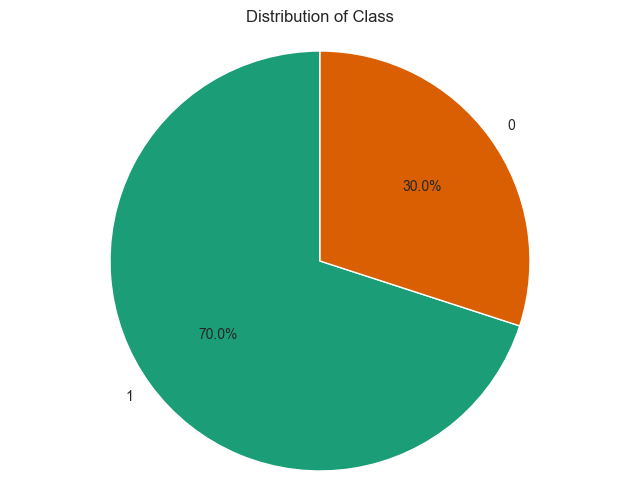

In [665]:
algorithm.pie_chart('Class' , data_frame)

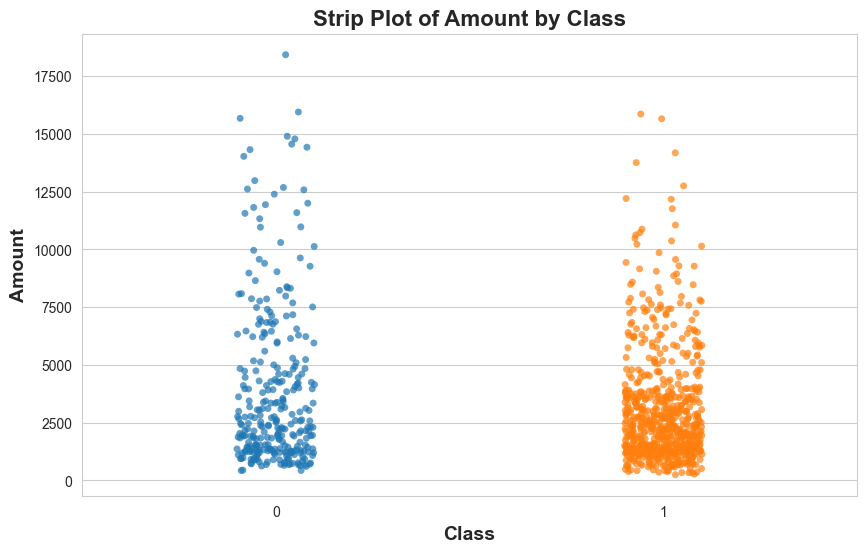

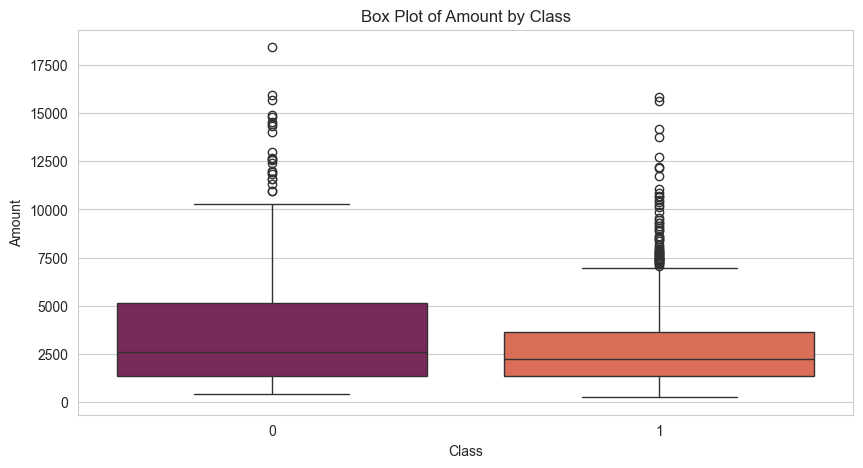

In [581]:
algorithm.strip_plot('Class' , 'Amount' , data_frame)
algorithm.box_plot('Class' , 'Amount' , data_frame)

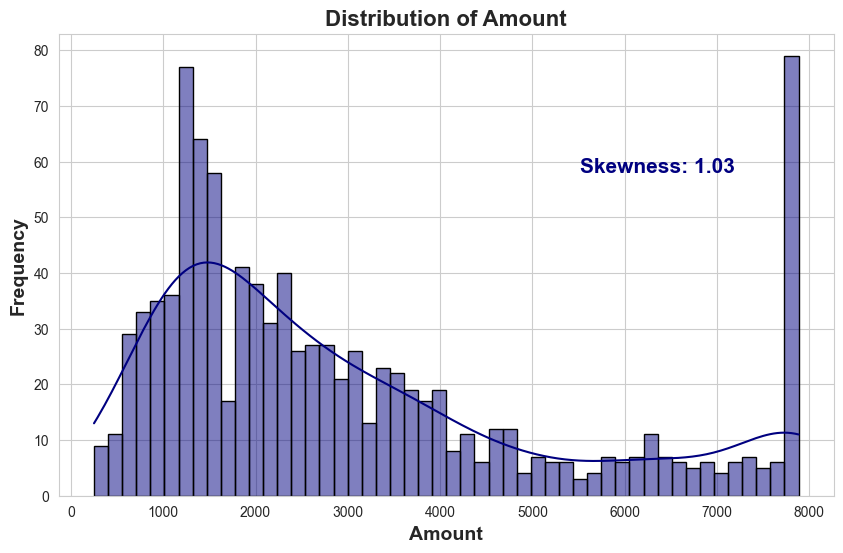

In [660]:
algorithm.histogram_plot('Amount' , data_frame)

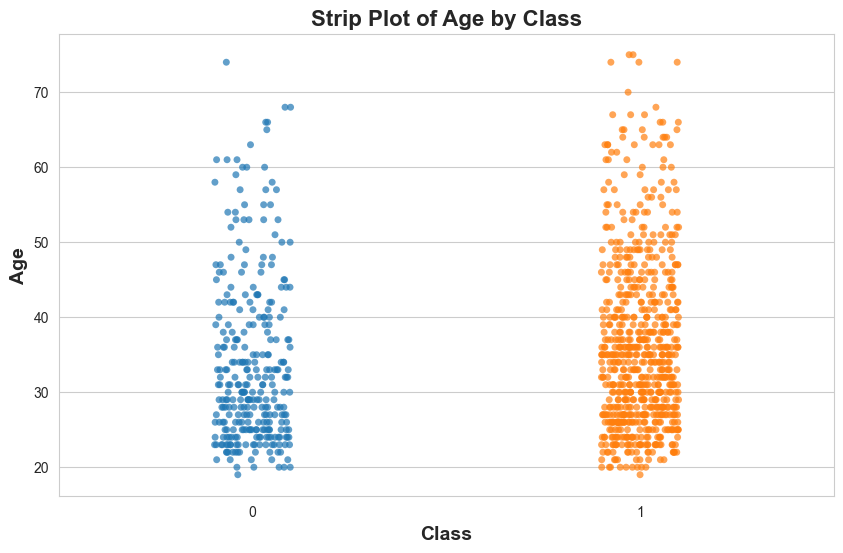

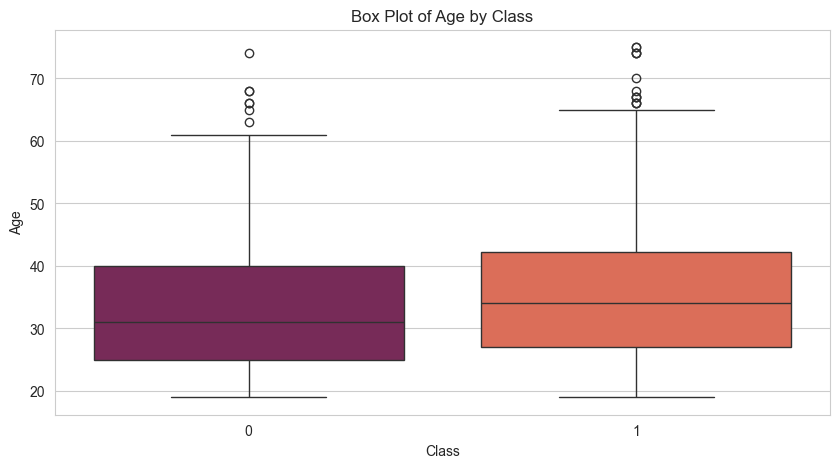

In [582]:
algorithm.strip_plot('Class' , 'Age' , data_frame)
algorithm.box_plot('Class' , 'Age' , data_frame)

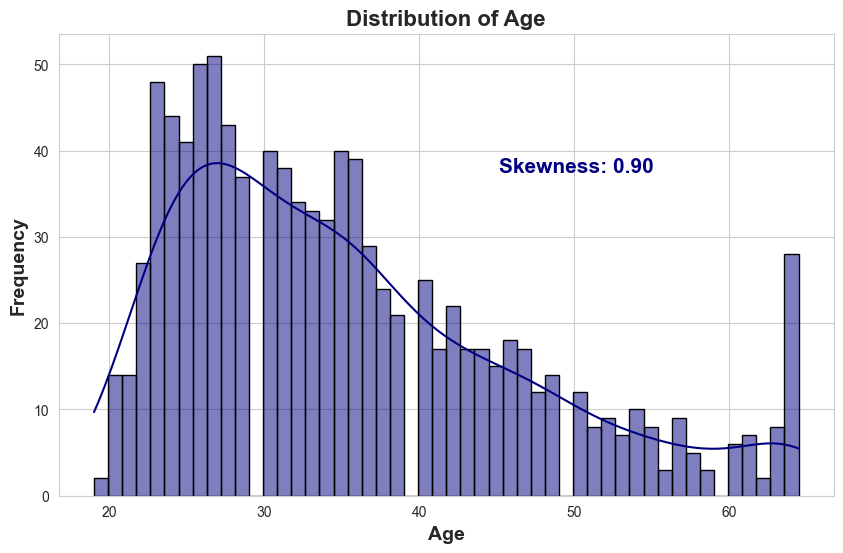

In [662]:
algorithm.histogram_plot('Age' , data_frame)

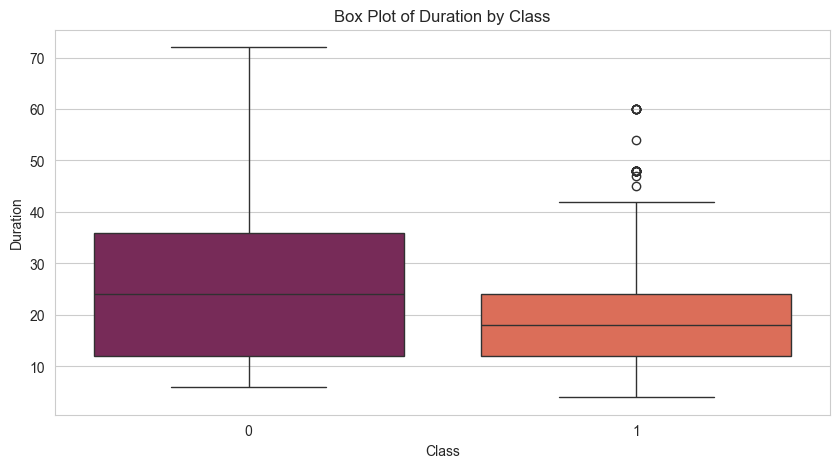

In [583]:
algorithm.box_plot('Class' , 'Duration' , data_frame)

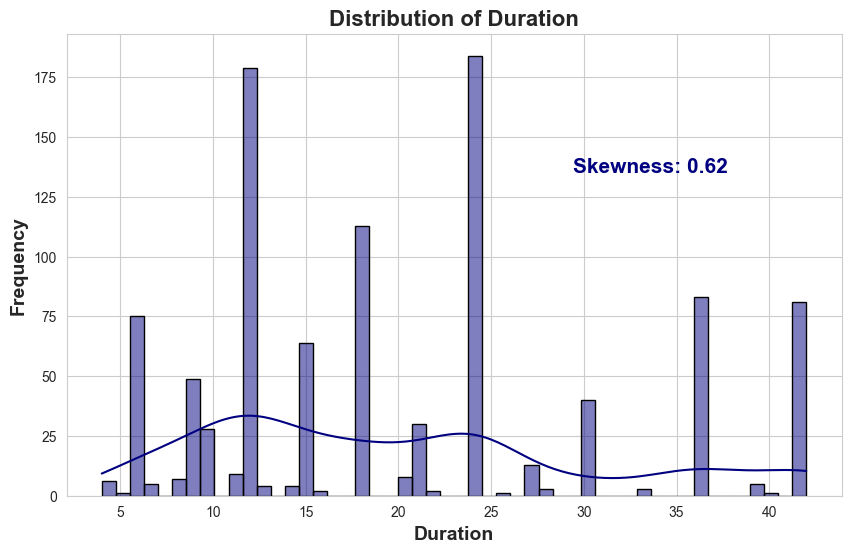

In [663]:
algorithm.histogram_plot('Duration' , data_frame)

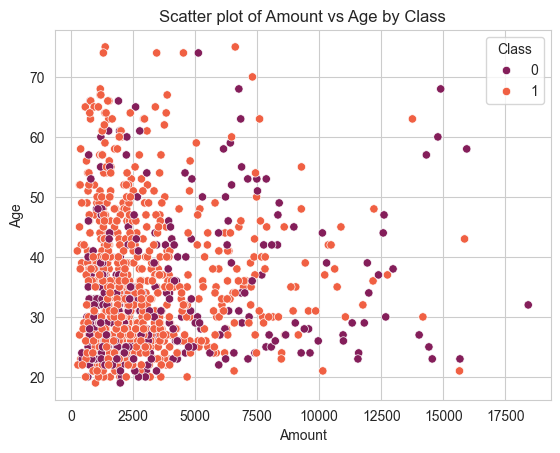

In [584]:
algorithm.scatter_plot('Amount' , 'Age' , 'Class' , data_frame)

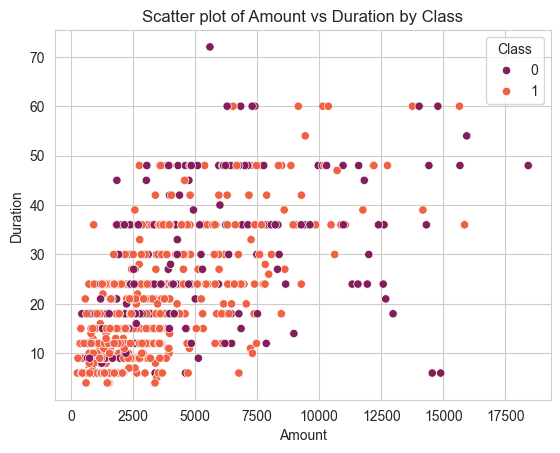

In [585]:
algorithm.scatter_plot('Amount' , 'Duration' , 'Class' , data_frame)

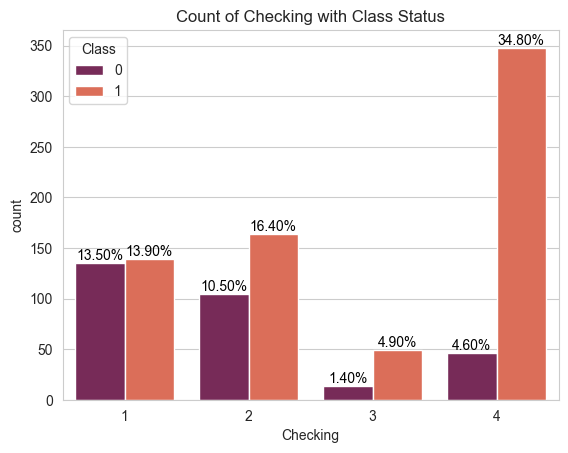

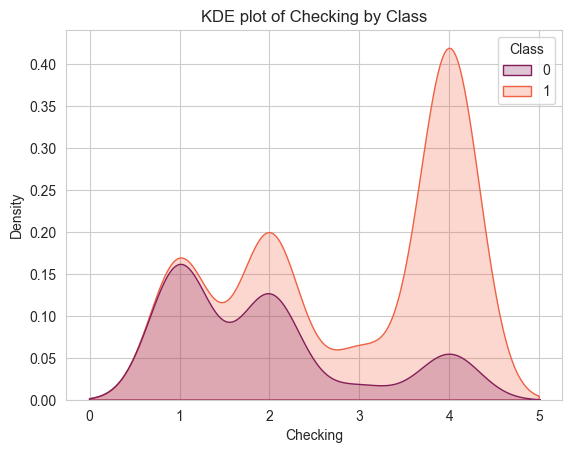

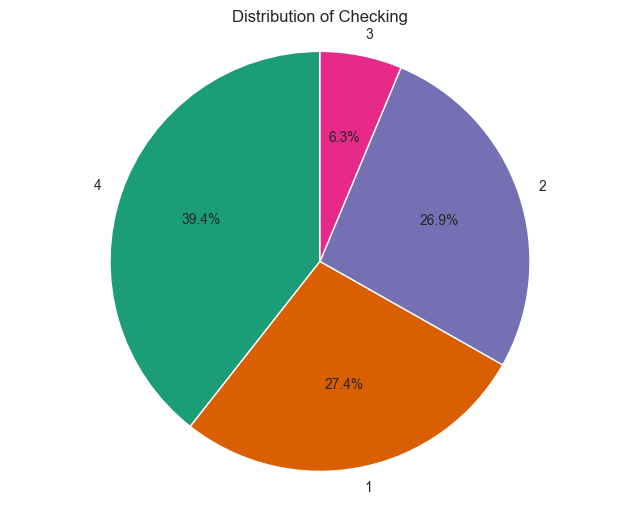

In [668]:
algorithm.count_plot('Checking' , 'Class' , data_frame)
algorithm.kde_plot('Checking' , 'Class' , data_frame)
algorithm.pie_chart('Checking' , data_frame)

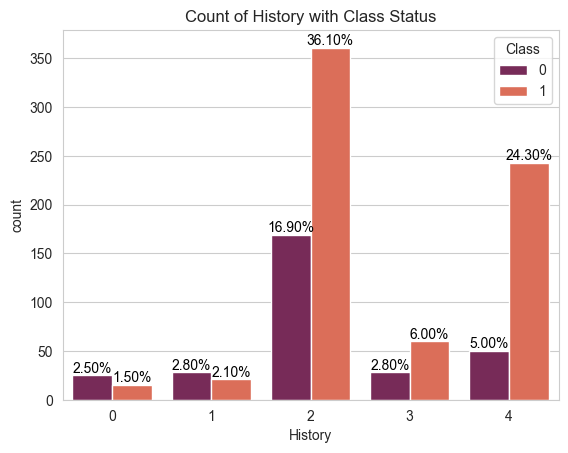

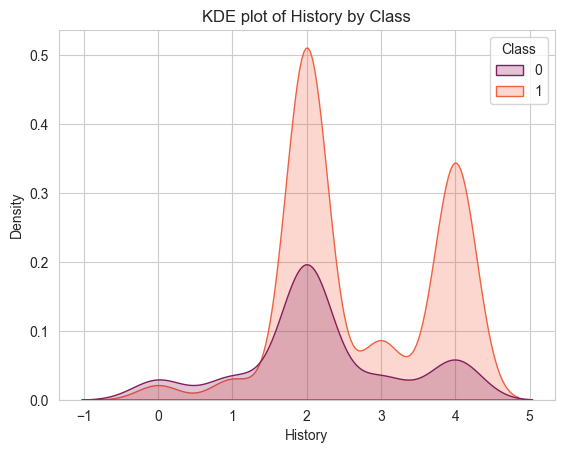

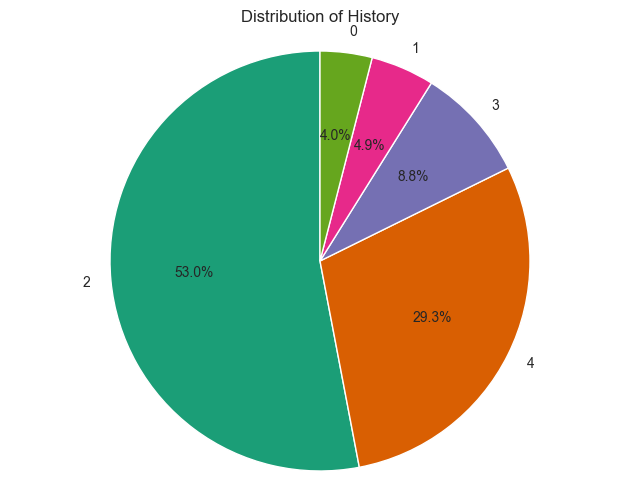

In [669]:
algorithm.count_plot('History' , 'Class' , data_frame)
algorithm.kde_plot('History' , 'Class' , data_frame)
algorithm.pie_chart('History' , data_frame)

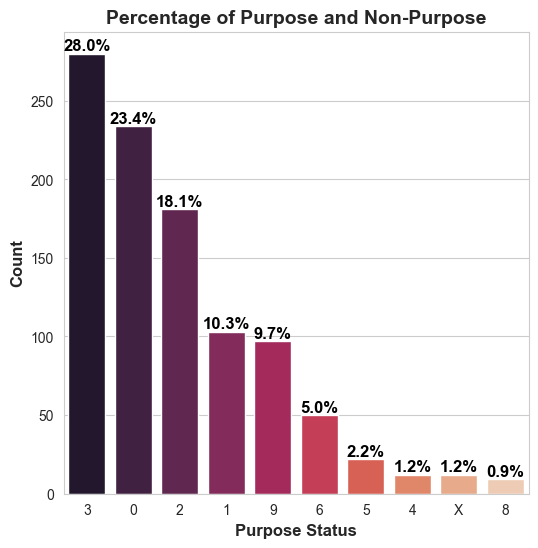

In [593]:
algorithm.bar_plot('Purpose' , data_frame)

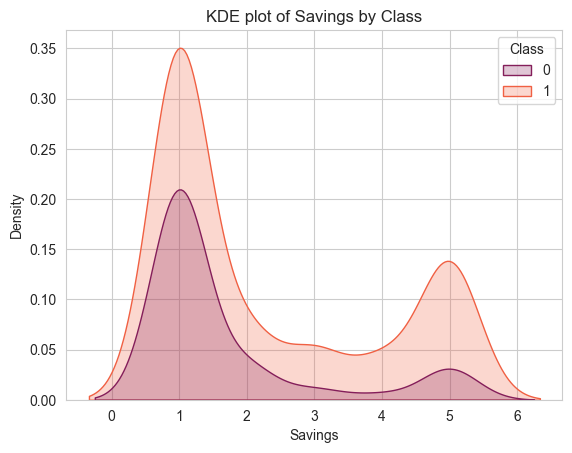

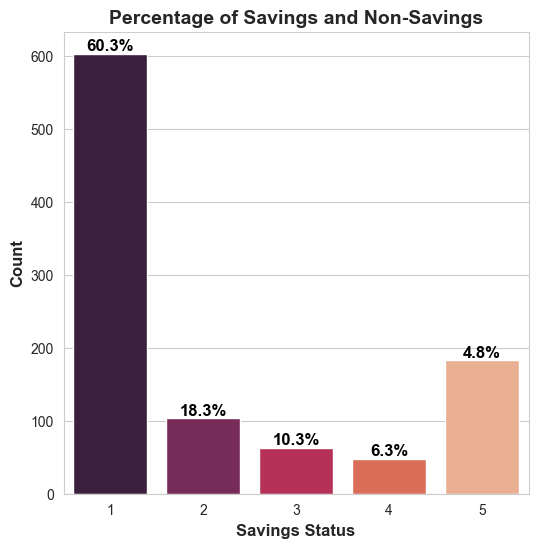

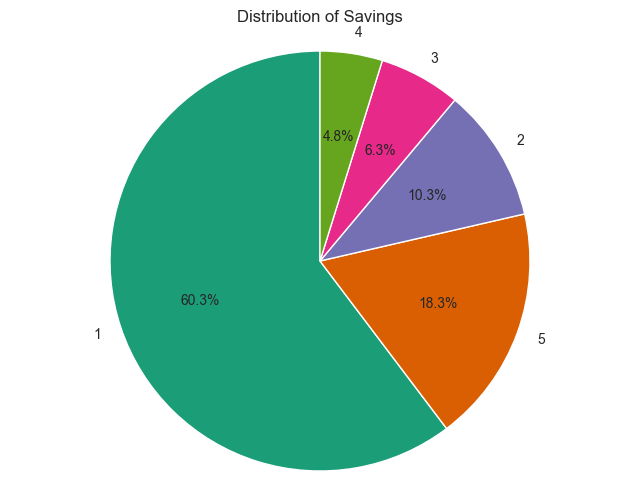

In [670]:
algorithm.kde_plot('Savings' , 'Class' , data_frame)
algorithm.bar_plot('Savings' , data_frame)
algorithm.pie_chart('Savings' , data_frame)

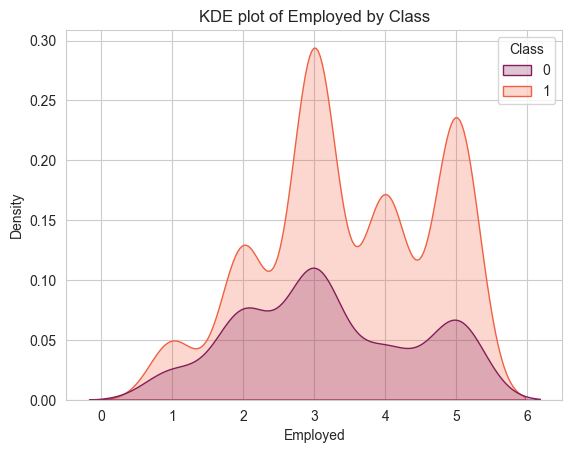

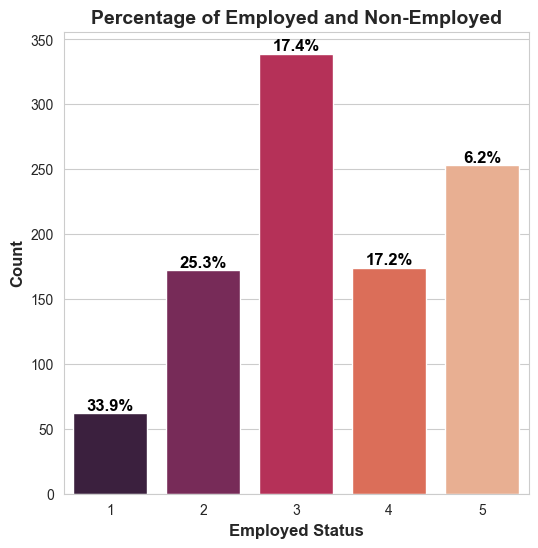

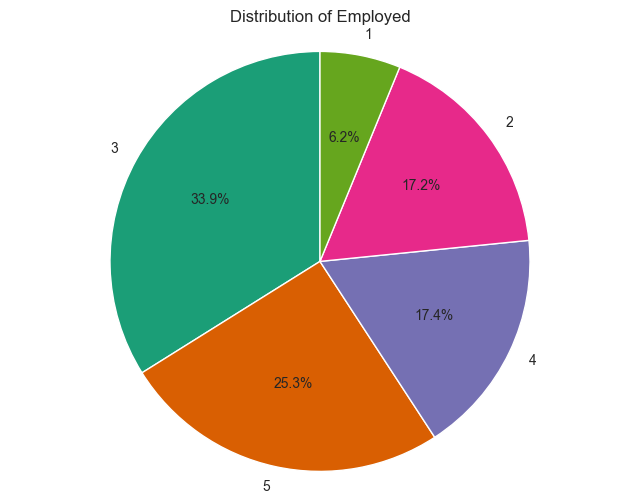

In [671]:
algorithm.kde_plot('Employed' , 'Class' , data_frame)
algorithm.bar_plot('Employed' , data_frame)
algorithm.pie_chart('Employed' , data_frame)

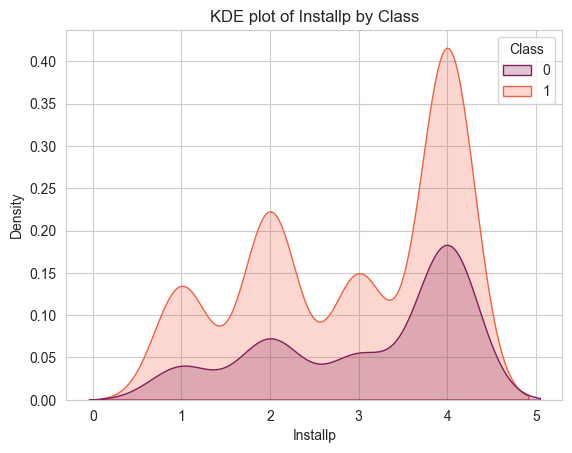

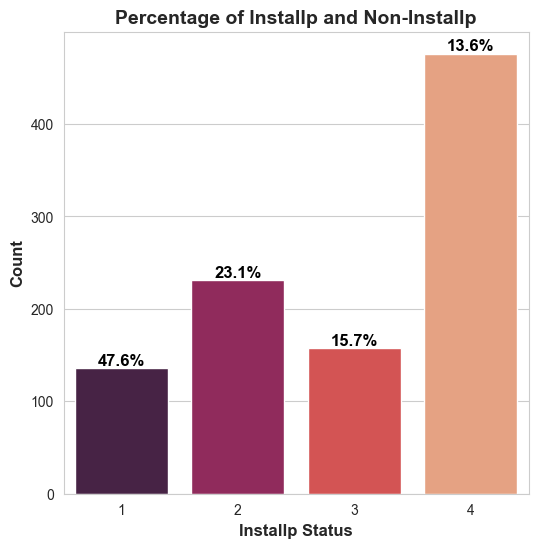

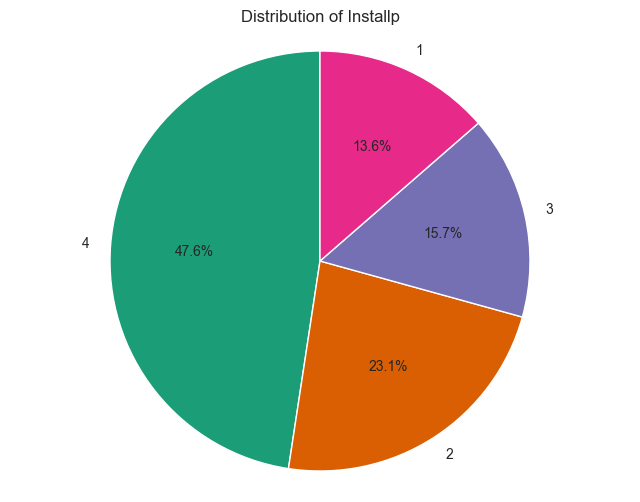

In [672]:
algorithm.kde_plot('Installp' , 'Class' , data_frame)
algorithm.bar_plot('Installp' , data_frame)
algorithm.pie_chart('Installp' , data_frame)

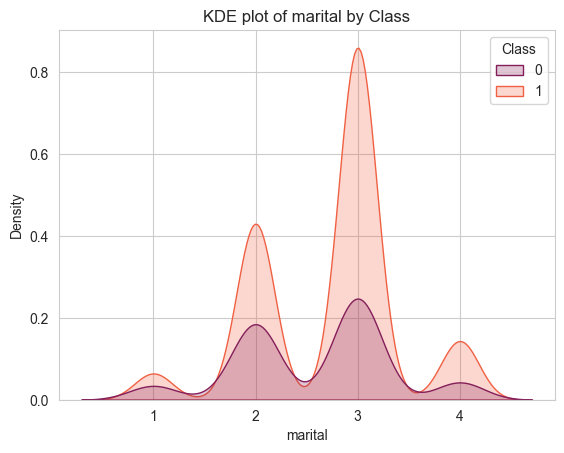

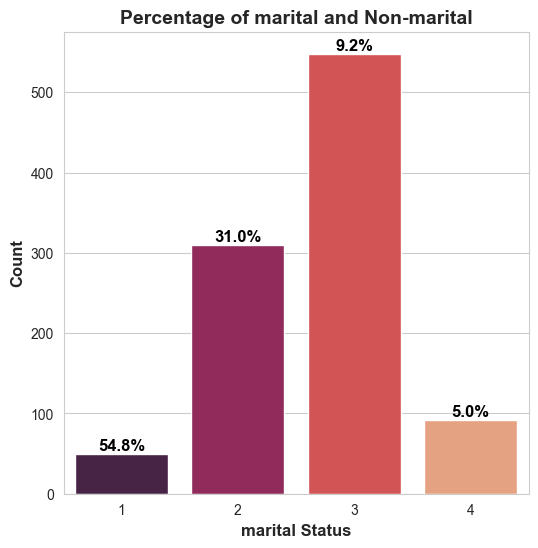

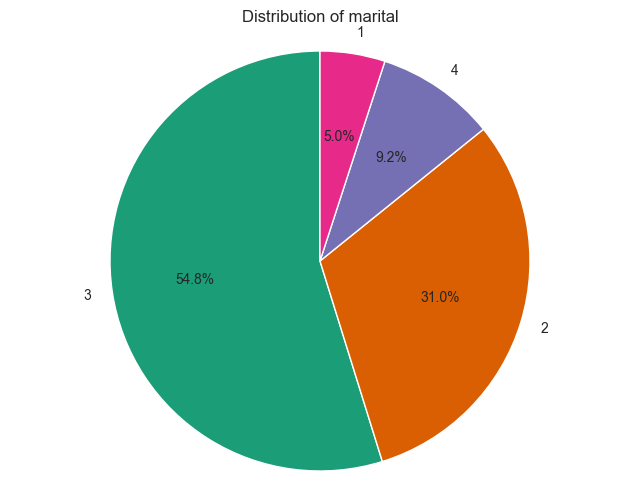

In [673]:
algorithm.kde_plot('marital' , 'Class' , data_frame)
algorithm.bar_plot('marital' , data_frame)
algorithm.pie_chart('marital' , data_frame)

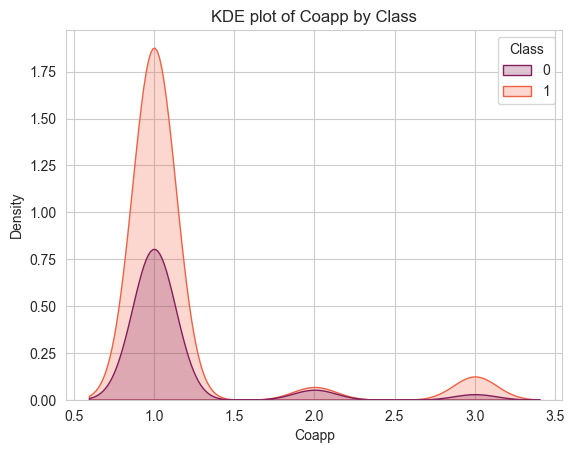

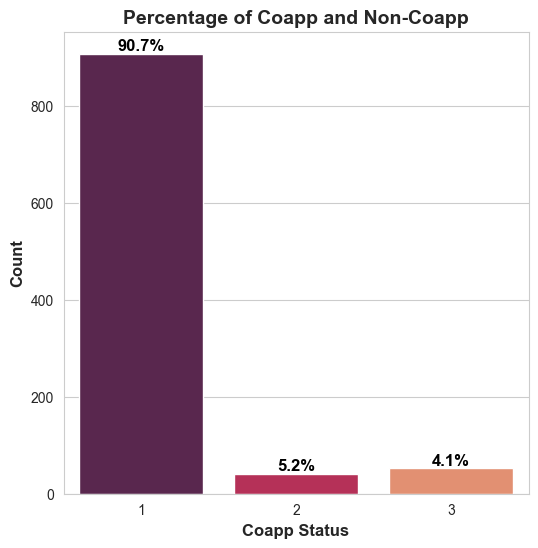

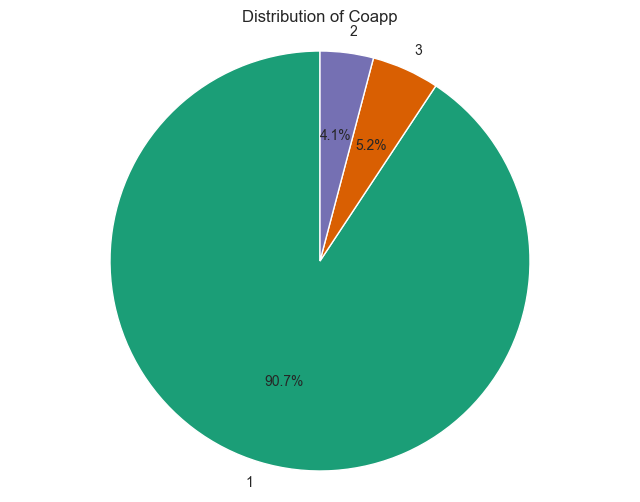

In [674]:
algorithm.kde_plot('Coapp' , 'Class' , data_frame)
algorithm.bar_plot('Coapp' , data_frame)
algorithm.pie_chart('Coapp' , data_frame)

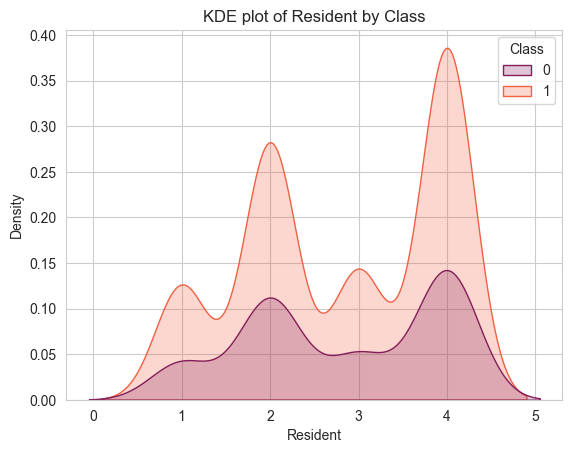

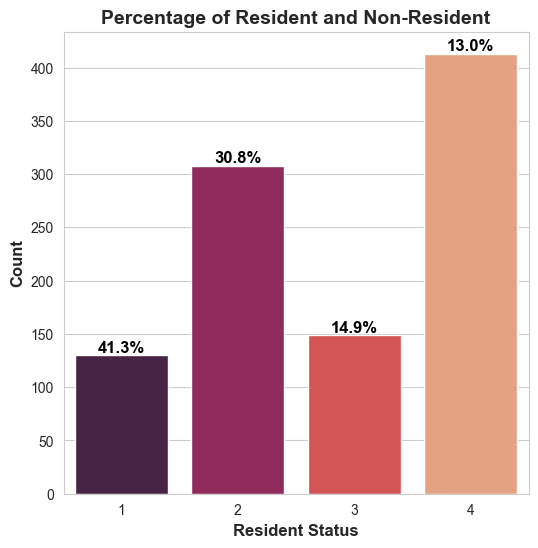

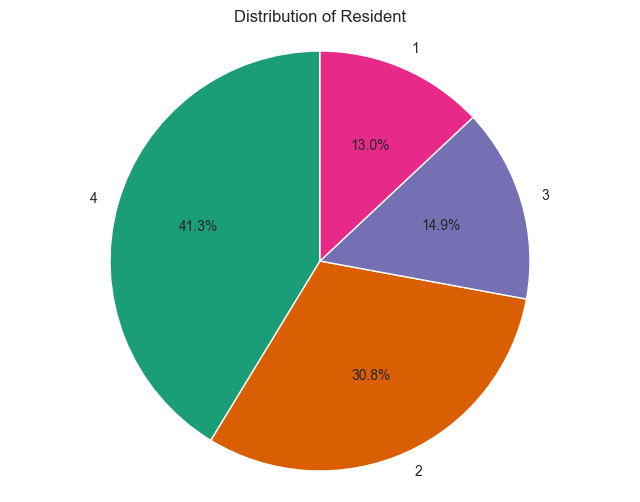

In [675]:
algorithm.kde_plot('Resident' , 'Class' , data_frame)
algorithm.bar_plot('Resident' , data_frame)
algorithm.pie_chart('Resident' , data_frame)

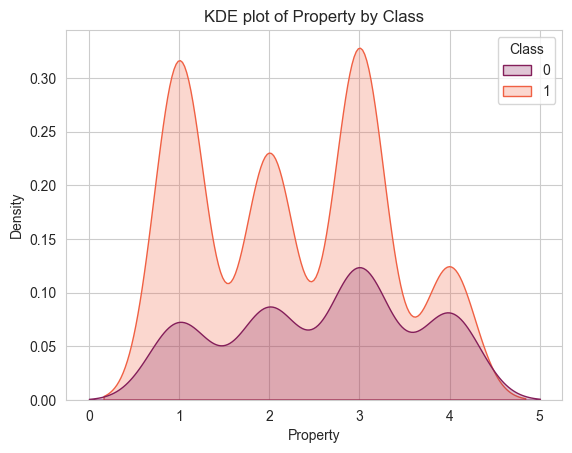

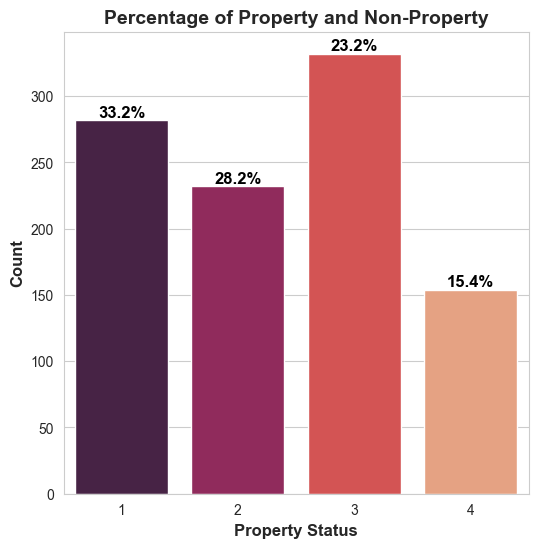

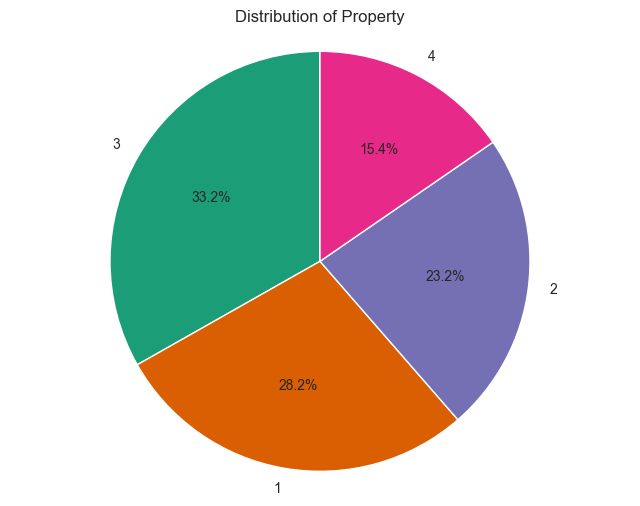

In [676]:
algorithm.kde_plot('Property' , 'Class' , data_frame)
algorithm.bar_plot('Property' , data_frame)
algorithm.pie_chart('Property' , data_frame)

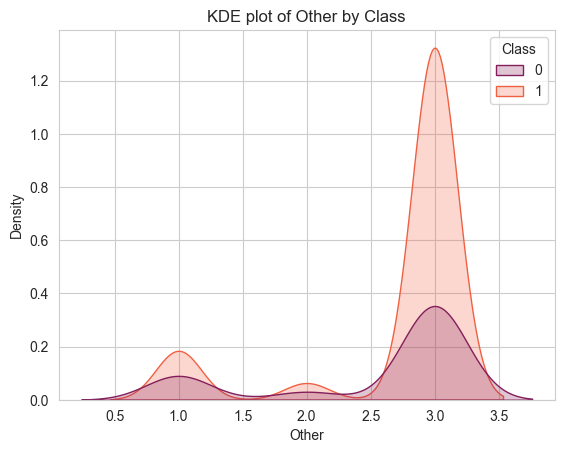

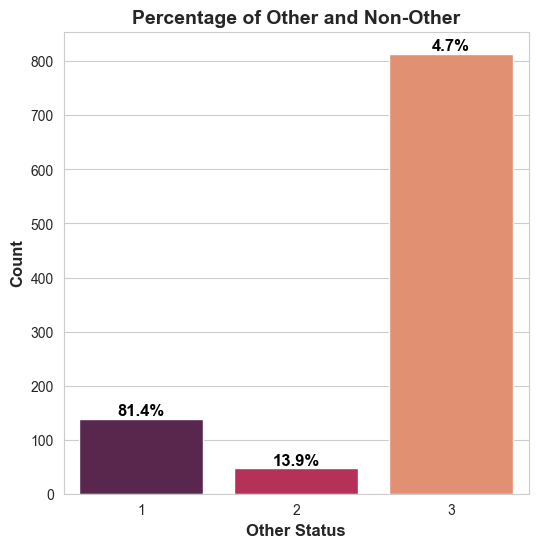

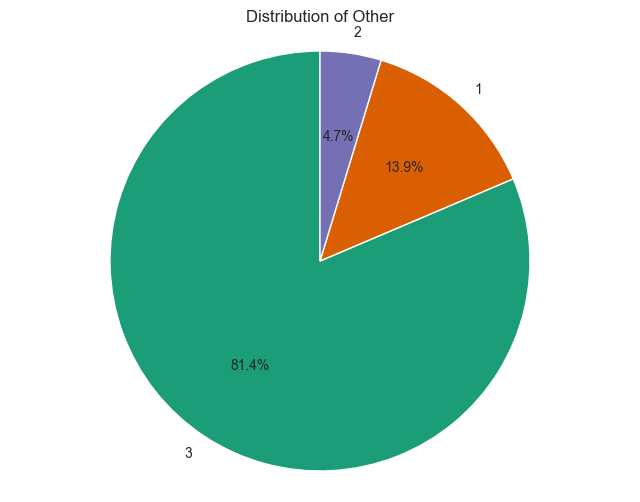

In [677]:
algorithm.kde_plot('Other' , 'Class' , data_frame)
algorithm.bar_plot('Other' , data_frame)
algorithm.pie_chart('Other' , data_frame)

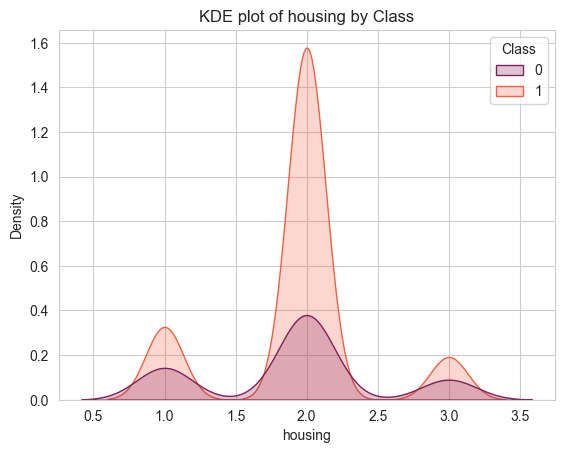

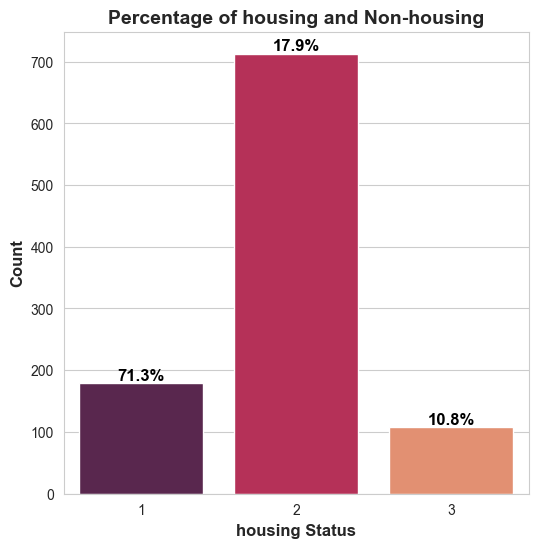

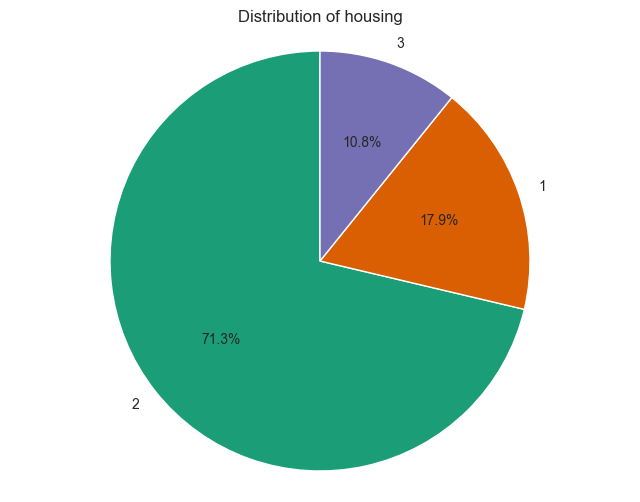

In [678]:
algorithm.kde_plot('housing' , 'Class' , data_frame)
algorithm.bar_plot('housing' , data_frame)
algorithm.pie_chart('housing' , data_frame)

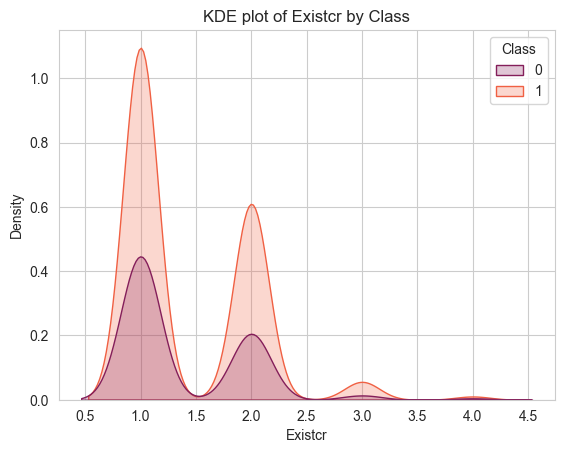

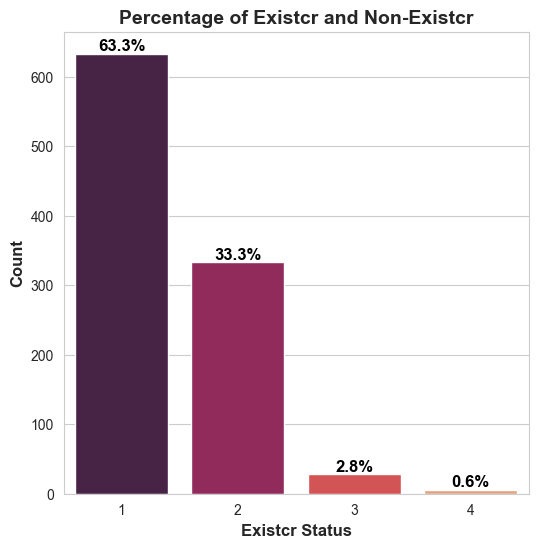

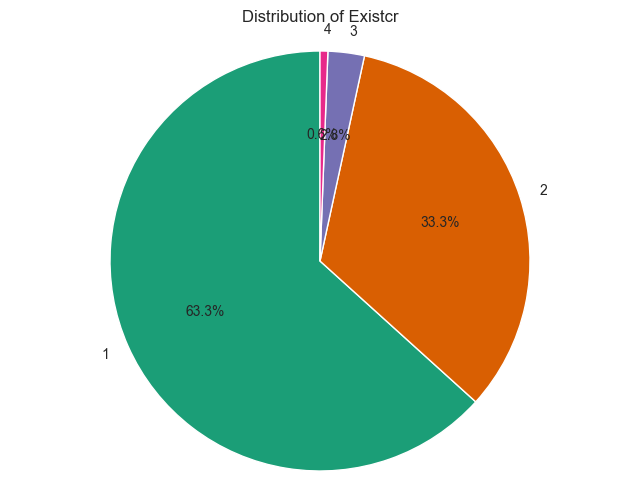

In [679]:
algorithm.kde_plot('Existcr' , 'Class' , data_frame)
algorithm.bar_plot('Existcr' , data_frame)
algorithm.pie_chart('Existcr' , data_frame)

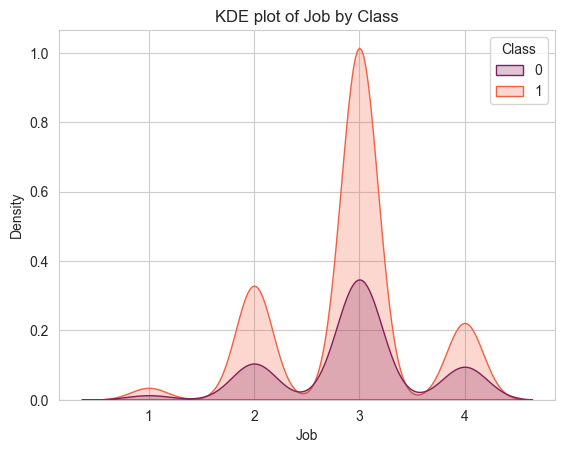

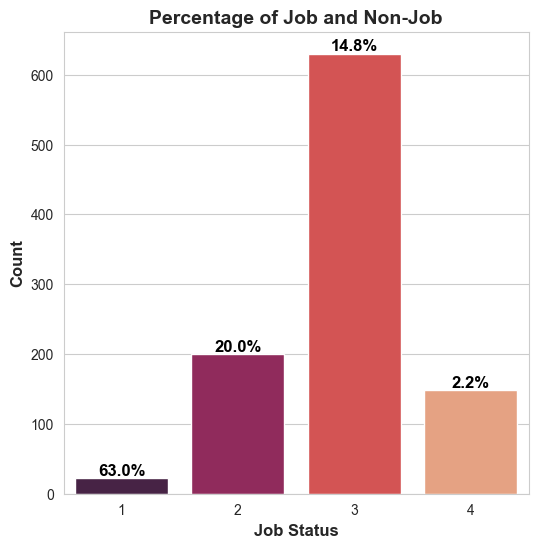

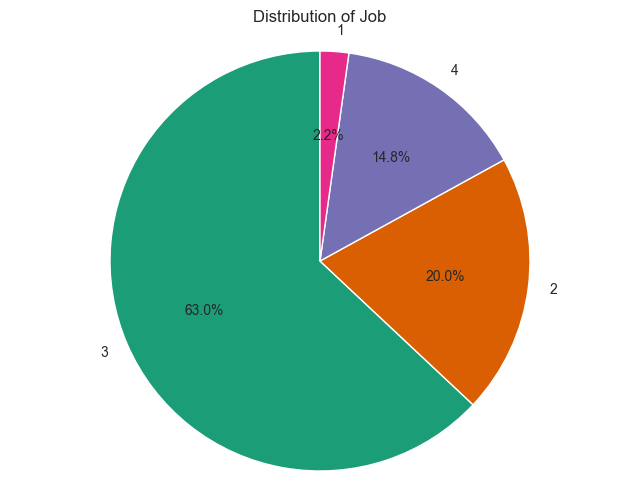

In [680]:
algorithm.kde_plot('Job' , 'Class' , data_frame)
algorithm.bar_plot('Job' , data_frame)
algorithm.pie_chart('Job' , data_frame)

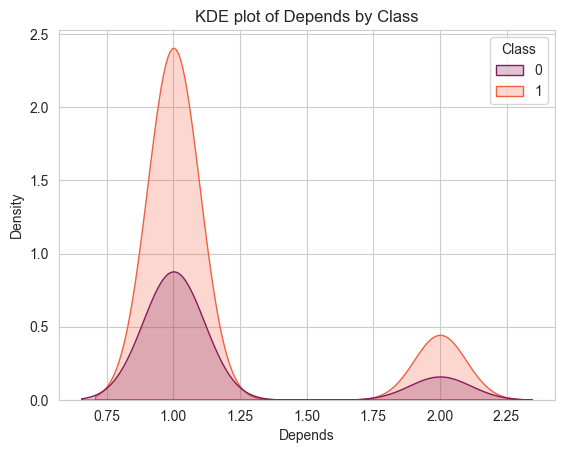

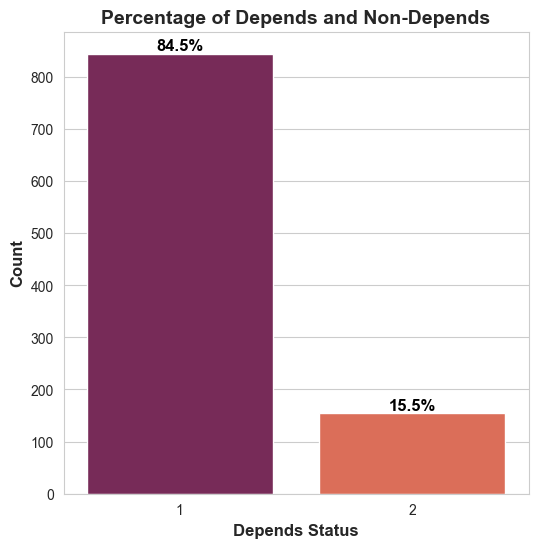

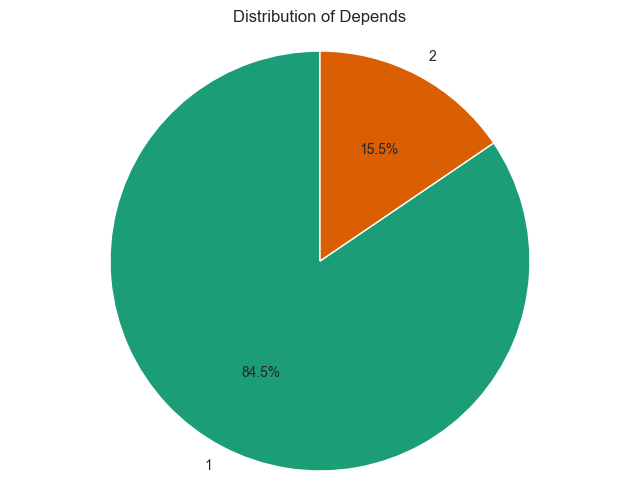

In [681]:
algorithm.kde_plot('Depends' , 'Class' , data_frame)
algorithm.bar_plot('Depends' , data_frame)
algorithm.pie_chart('Depends' , data_frame)

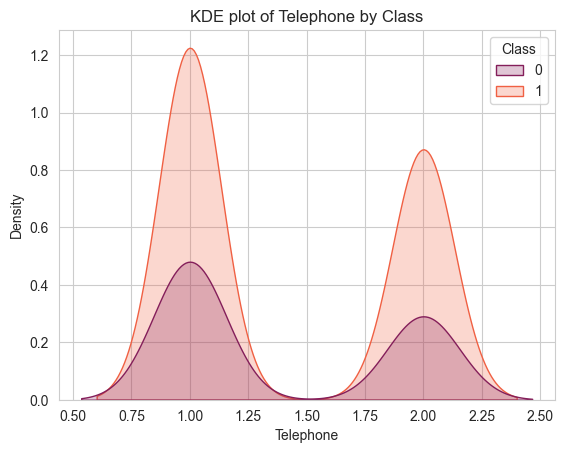

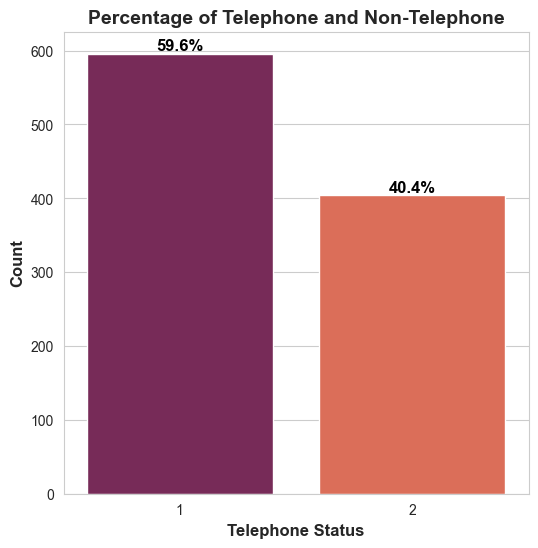

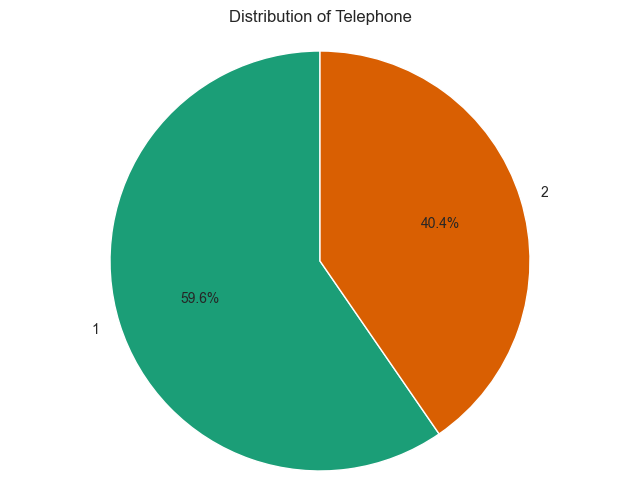

In [682]:
algorithm.kde_plot('Telephone' , 'Class' , data_frame)
algorithm.bar_plot('Telephone' , data_frame)
algorithm.pie_chart('Telephone' , data_frame)

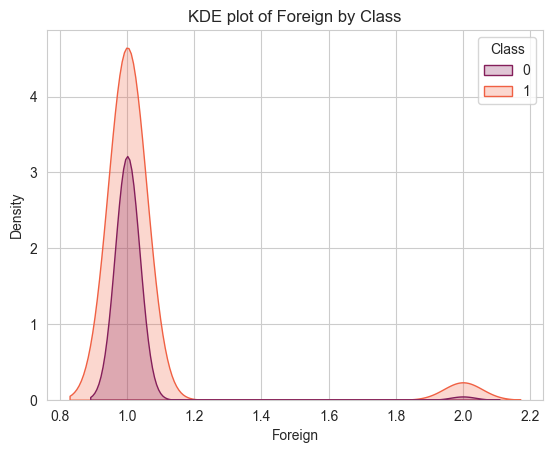

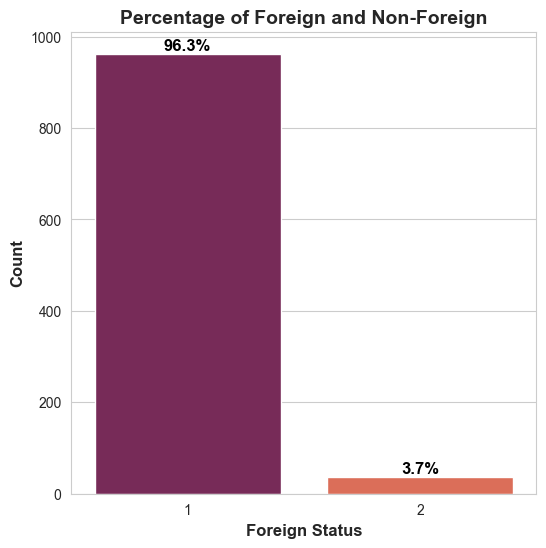

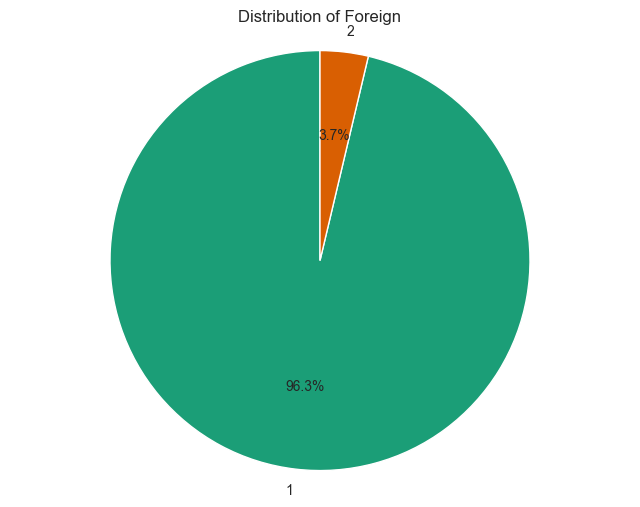

In [683]:
algorithm.kde_plot('Foreign' , 'Class' , data_frame)
algorithm.bar_plot('Foreign' , data_frame)
algorithm.pie_chart('Foreign' , data_frame)

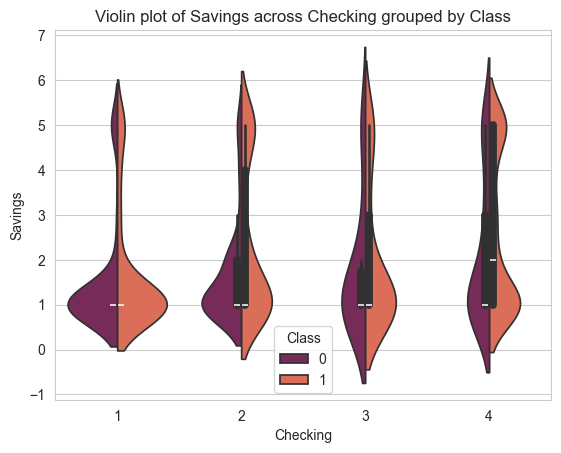

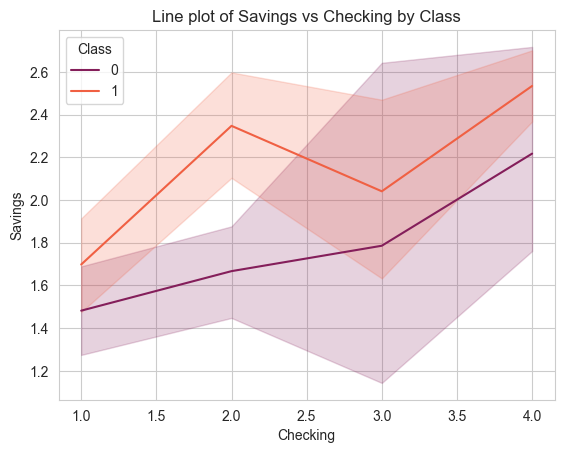

In [684]:
algorithm.violin_plot('Checking' , 'Savings', 'Class' , data_frame)
algorithm.line_plot('Checking' , 'Savings', 'Class' , data_frame)

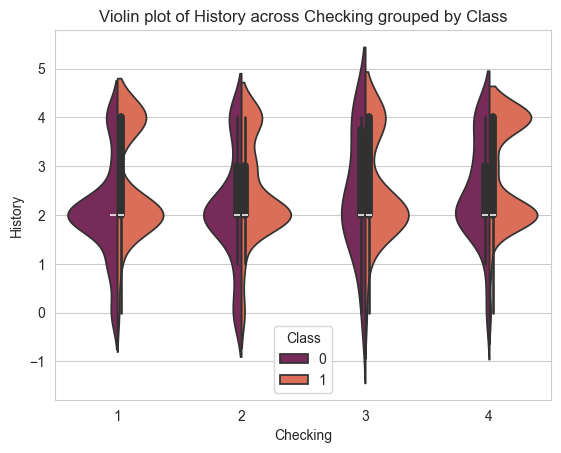

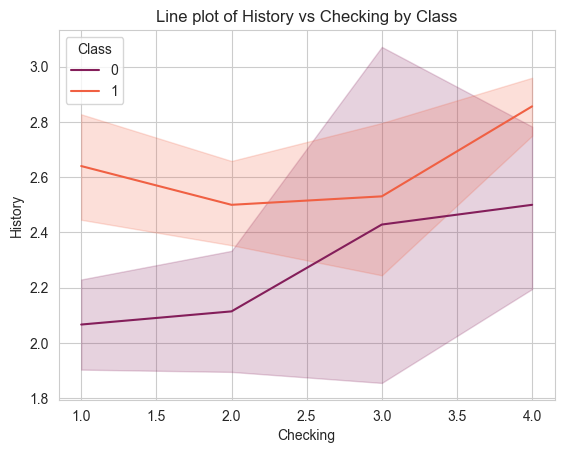

In [608]:
algorithm.violin_plot('Checking' , 'History', 'Class' , data_frame)
algorithm.line_plot('Checking' , 'History', 'Class' , data_frame)


## **Preprocessing**


In [609]:
numerical_columns = ['Duration' , 'Amount' , 'Age']
categorical_columns = ['Checking' , 'History' , 'Purpose' , 'Savings' , 'Employed' , 'Installp' , 'marital' , 'Coapp' , 'Resident' , 'Property' , 'Other' , 'housing' , 'Existcr' , 'Job' , 'Depends' , 'Telephone' , 'Foreign']

### **Nulls**


In [610]:
# no nulls

### **Outliers**


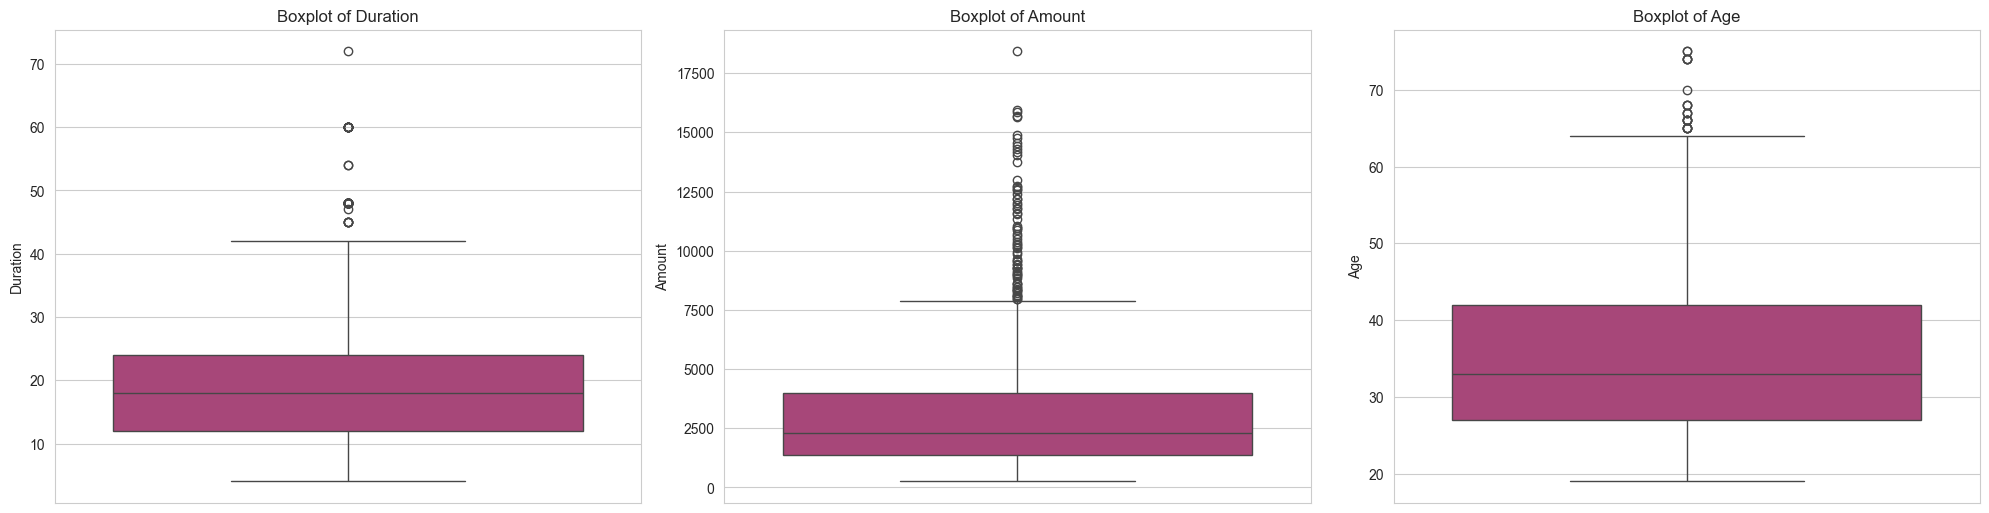

In [611]:
algorithm.check_outliers(numerical_columns , data_frame)

In [612]:
def amount_binner(x, bin_size=1000):
    return int((x - 1) // bin_size + 1)

data_frame['Amount Binner'] = data_frame['Amount'].apply(amount_binner)

print(data_frame['Amount Binner'].unique())

[ 2  6  3  8  5 10  7  4  9 13  1 15 16 12 11 14 19]


In [613]:
unique = data_frame['Amount Binner'].unique()
duplicated = dict()
for value in data_frame['Amount Binner']:
    if value not in duplicated:
        duplicated[value] = 1
    else:
        duplicated[value] = duplicated[value] + 1
        
percentage = dict()

for key , value in duplicated.items():
    percentage[key] = (value / 1000) * 100 
percentage

{2: 31.6,
 6: 3.9,
 3: 18.8,
 8: 3.5000000000000004,
 5: 5.800000000000001,
 10: 1.3,
 7: 4.3999999999999995,
 4: 13.4,
 9: 1.7000000000000002,
 13: 0.8,
 1: 11.600000000000001,
 15: 0.7000000000000001,
 16: 0.4,
 12: 0.8,
 11: 1.0999999999999999,
 14: 0.1,
 19: 0.1}

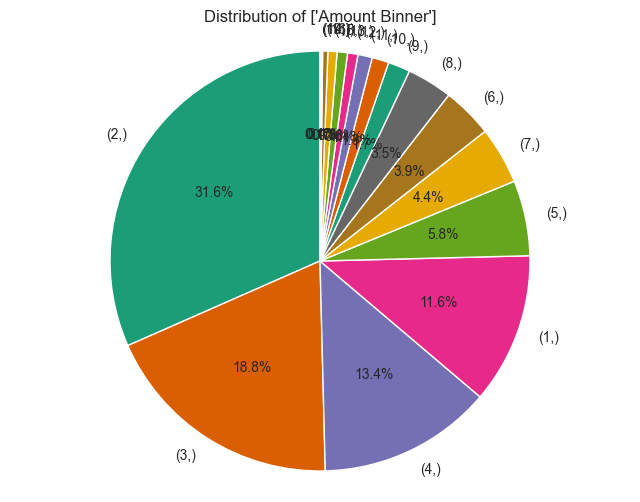

In [614]:
algorithm.pie_chart(['Amount Binner'] , data_frame)

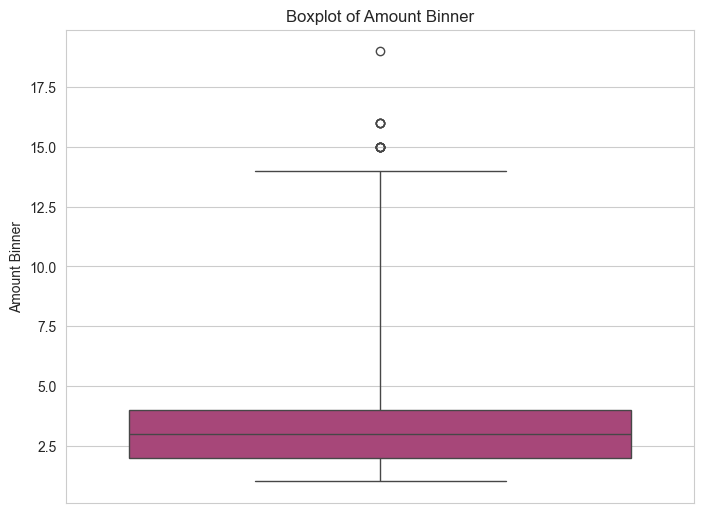

In [615]:
algorithm.check_outliers(['Amount Binner'] , data_frame , whis=5)

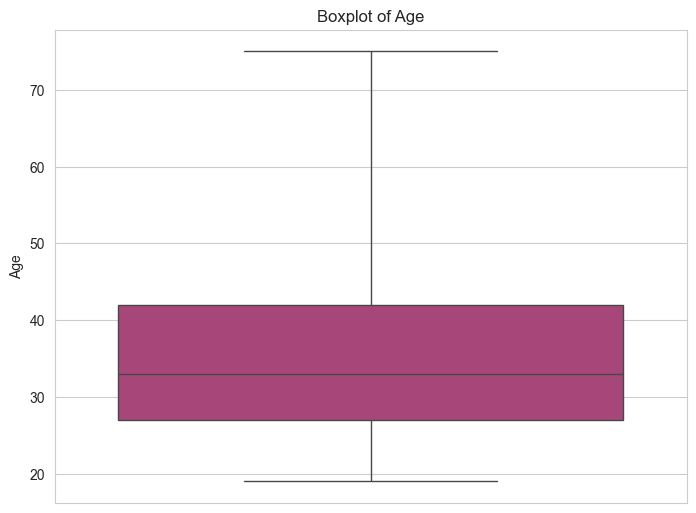

In [616]:
algorithm.check_outliers(['Age'] , data_frame , whis=2.2)

In [617]:
algorithm.handle_outliers(data_frame , numerical_columns , handle = 'yes')
algorithm.handle_outliers(data_frame , ['Amount Binner'] , handle = 'yes')

Number of lower Outliers in Duration : 0
Number of upper Outliers in Duration : 70
Number of lower Outliers in Amount : 0
Number of upper Outliers in Amount : 72
Number of lower Outliers in Age : 0
Number of upper Outliers in Age : 23
Number of lower Outliers in Amount Binner : 0
Number of upper Outliers in Amount Binner : 105


,Checking,Duration,History,Purpose,Amount,Savings,Employed,Installp,marital,Coapp,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Class,Amount Binner
0,1,6.0,4,3,1169.0,5,5,4,3,1,...,64.5,3,2,2,3,1,2,1,1,2.0
1,2,42.0,2,3,5951.0,1,3,2,2,1,...,22.0,3,2,1,3,1,1,1,0,6.0
2,4,12.0,4,6,2096.0,1,4,2,3,1,...,49.0,3,2,1,2,2,1,1,1,3.0
3,1,42.0,2,2,7882.0,1,4,2,3,3,...,45.0,3,3,1,3,2,1,1,1,7.0
4,1,24.0,3,0,4870.0,1,3,3,3,1,...,53.0,3,3,2,3,2,1,1,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12.0,2,2,1736.0,1,4,3,2,1,...,31.0,3,2,1,2,1,1,1,1,2.0
996,1,30.0,2,1,3857.0,1,3,4,1,1,...,40.0,3,2,1,4,1,2,1,1,4.0
997,4,12.0,2,3,804.0,1,5,4,3,1,...,38.0,3,2,1,3,1,1,1,1,1.0
998,1,42.0,2,3,1845.0,1,3,4,3,1,...,23.0,3,3,1,3,1,2,1,0,2.0


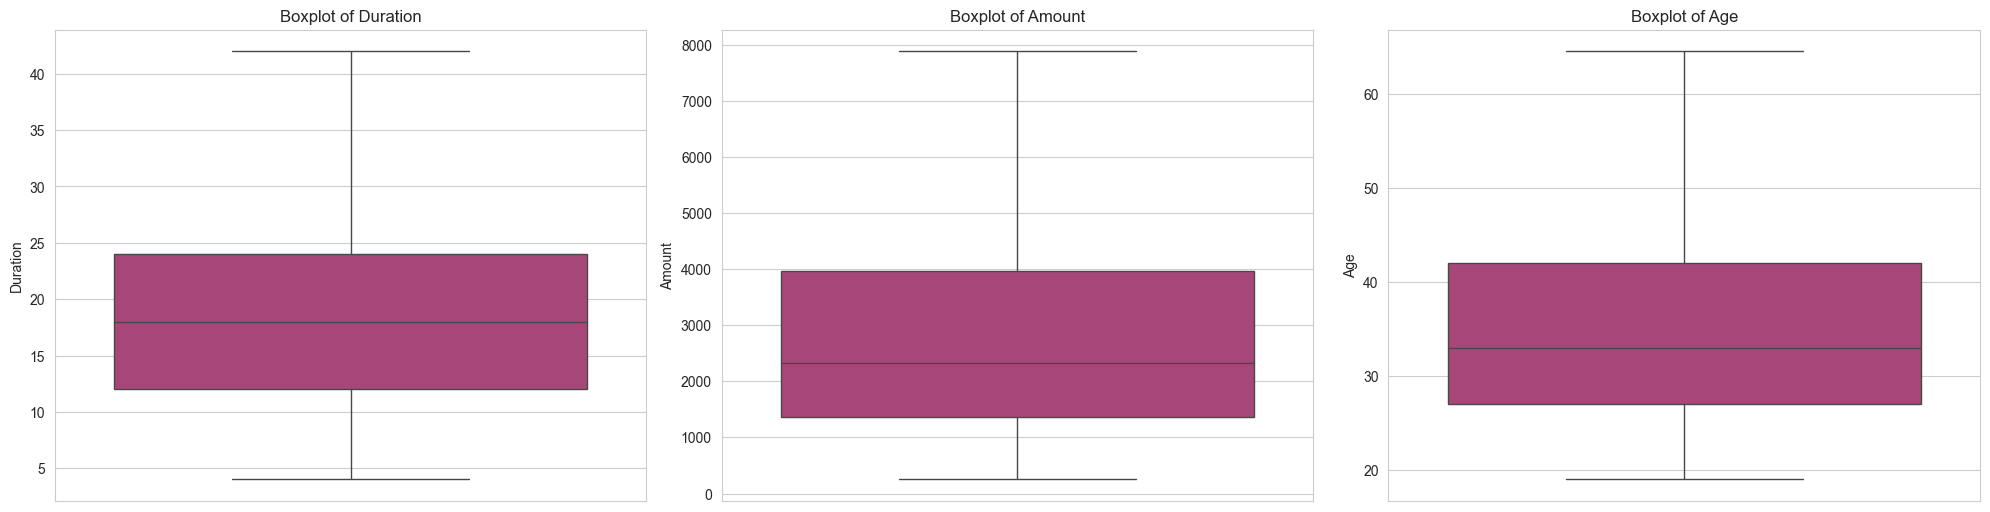

In [618]:
algorithm.check_outliers(numerical_columns , data_frame)

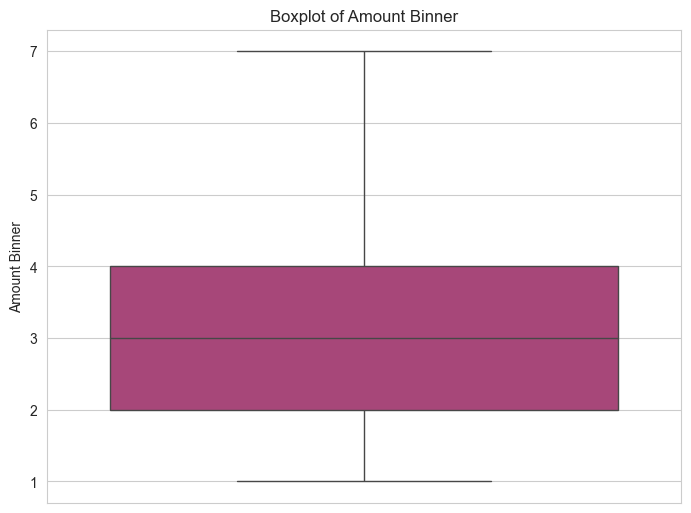

In [619]:
algorithm.check_outliers(['Amount Binner'] , data_frame)

### **Feature Engineering**


In [620]:
# duration + amount , age
# checking + history , savings , property

data_frame['Amount Duration Ratio'] = data_frame['Amount'] / data_frame['Duration']
data_frame['Age Per Duration'] = data_frame['Age'] / data_frame['Duration']
data_frame['Checking History'] = data_frame['Checking'] + data_frame['History']
data_frame['Savings Property'] = data_frame['Savings'] + data_frame['Property']
data_frame['Amount Age Ratio'] = data_frame['Amount'] / data_frame['Age']
data_frame['Duration Age Ratio'] = data_frame['Duration'] / data_frame['Age']

In [621]:
numerical_columns = ['Duration' , 'Amount' , 'Age' , 'Amount Duration Ratio' , 'Age Per Duration' , 'Amount Age Ratio' , 'Duration Age Ratio' , 'Amount Binner']
categorical_columns = ['Checking' , 'History' , 'Purpose' , 'Savings' , 'Employed' , 'Installp' , 'marital' , 'Coapp' , 'Resident' , 'Property' , 'Other' , 'housing' , 'Existcr' , 'Job' , 'Depends' , 'Telephone' , 'Foreign' , 'Amount Binner' , 'Checking History' , 'Savings Property']

### **Duplicates**


In [622]:
# no duplicates

## **Spliting**


In [623]:
x_train , x_test , y_train , y_test = algorithm.spliting_data(data_frame , 'Class')

## **Scaling**


In [ ]:
algorithm.data_information(data_frame)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Checking,"[1, 2, 4, 3]",int64,4,0,0.0,0
1,Duration,"[6.0, 42.0, 12.0, 24.0, 36.0, 30.0, 15.0, 9.0,...",float64,27,0,0.0,0
2,History,"[4, 2, 3, 0, 1]",int64,5,0,0.0,0
3,Purpose,"[3, 6, 2, 0, 1, 9, 4, 5, X, 8]",object,10,0,0.0,0
4,Amount,"[1169.0, 5951.0, 2096.0, 7882.0, 4870.0, 7882....",float64,850,0,0.0,0
5,Savings,"[5, 1, 3, 4, 2]",int64,5,0,0.0,0
6,Employed,"[5, 3, 4, 1, 2]",int64,5,0,0.0,0
7,Installp,"[4, 2, 3, 1]",int64,4,0,0.0,0
8,marital,"[3, 2, 1, 4]",int64,4,0,0.0,0
9,Coapp,"[1, 3, 2]",int64,3,0,0.0,0


In [625]:
x_train_ss , x_test_ss = algorithm.scaling_data('standard scaler' , data_frame , x_train , x_test , ['Duration' , 'Age' , 'Amount' , 'Amount Duration Ratio' , 'Amount Age Ratio'])
x_train_mms , x_test_mms = algorithm.scaling_data('min max scaler' , data_frame , x_train , x_test , ['Duration' , 'Age' , 'Amount' , 'Amount Duration Ratio' , 'Amount Age Ratio'])
x_train_rs , x_test_rs = algorithm.scaling_data('robust scaler' , data_frame , x_train , x_test , ['Duration' , 'Age' , 'Amount' , 'Amount Duration Ratio' , 'Amount Age Ratio'])

In [626]:
algorithm.data_information(x_train_ss)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Checking,"[1, 3, 4, 2]",int64,4,0,0.0,0
1,Duration,"[1.9999999999999993, 0.24999999999999983, -0.9...",float64,27,0,0.0,0
2,History,"[3, 4, 2, 0, 1]",int64,5,0,0.0,0
3,Purpose,"[9, 6, 1, 0, 3, 2, 5, 4, X, 8]",object,10,0,0.0,0
4,Amount,"[1.622995134258425, -0.005045954225986578, -0....",float64,687,0,0.0,0
5,Savings,"[1, 3, 5, 2, 4]",int64,5,0,0.0,0
6,Employed,"[5, 2, 3, 4, 1]",int64,5,0,0.0,0
7,Installp,"[3, 2, 1, 4]",int64,4,0,0.0,0
8,marital,"[3, 1, 2, 4]",int64,4,0,0.0,0
9,Coapp,"[1, 2, 3]",int64,3,0,0.0,0


## **Encoding**


In [ ]:
label_or_onehot = ['Purpose']
onehot_future = ['Foreign' , 'Telephone' , 'Depends' , 'housing' , 'Other' , 'Coapp']

x_train_ss , x_test_ss = algorithm.ordinal_encoding_data('ordinal' , x_train_ss , x_test_ss , data_frame , label_or_onehot)
x_train_mms , x_test_mms = algorithm.ordinal_encoding_data('ordinal' , x_train_mms , x_test_mms , data_frame , label_or_onehot)
x_train_rs , x_test_rs = algorithm.ordinal_encoding_data('ordinal' , x_train_rs , x_test_rs , data_frame , label_or_onehot)

x_train_ss = pd.get_dummies(x_train_ss, columns = onehot_future)
x_test_ss = pd.get_dummies(x_test_ss, columns = onehot_future)
x_train_mms = pd.get_dummies(x_train_mms, columns = onehot_future)
x_test_mms = pd.get_dummies(x_test_mms, columns = onehot_future)
x_train_rs = pd.get_dummies(x_train_rs, columns = onehot_future)
x_test_rs = pd.get_dummies(x_test_rs, columns = onehot_future)

In [628]:
for col in x_train_ss.columns:
    if x_train_ss[col].dtype == 'bool':
        x_train_ss[col] = x_train_ss[col].astype(int)
        x_test_ss[col] = x_test_ss[col].astype(int)
    if x_train_mms[col].dtype == 'bool':
        x_train_mms[col] = x_train_mms[col].astype(int)
        x_test_mms[col] = x_test_mms[col].astype(int)
    if x_train_rs[col].dtype == 'bool':
        x_train_rs[col] = x_train_rs[col].astype(int)
        x_test_rs[col] = x_test_rs[col].astype(int)

In [629]:
algorithm.data_information(x_train_ss)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Checking,"[1, 3, 4, 2]",int64,4,0,0.0,0
1,Duration,"[1.9999999999999993, 0.24999999999999983, -0.9...",float64,27,0,0.0,0
2,History,"[3, 4, 2, 0, 1]",int64,5,0,0.0,0
3,Amount,"[1.622995134258425, -0.005045954225986578, -0....",float64,687,0,0.0,0
4,Savings,"[1, 3, 5, 2, 4]",int64,5,0,0.0,0
5,Employed,"[5, 2, 3, 4, 1]",int64,5,0,0.0,0
6,Installp,"[3, 2, 1, 4]",int64,4,0,0.0,0
7,marital,"[3, 1, 2, 4]",int64,4,0,0.0,0
8,Resident,"[4, 1, 2, 3]",int64,4,0,0.0,0
9,Property,"[4, 3, 2, 1]",int64,4,0,0.0,0


## **Feature Selection / Correlation**


In [630]:
numerical_columns = ['Duration' , 'Amount' , 'Age' , 'Amount Duration Ratio' , 'Age Per Duration' , 'Amount Age Ratio' , 'Duration Age Ratio' , 'Amount Binner']
categorical_columns = [col for col in x_train_ss.columns if col not in numerical_columns]

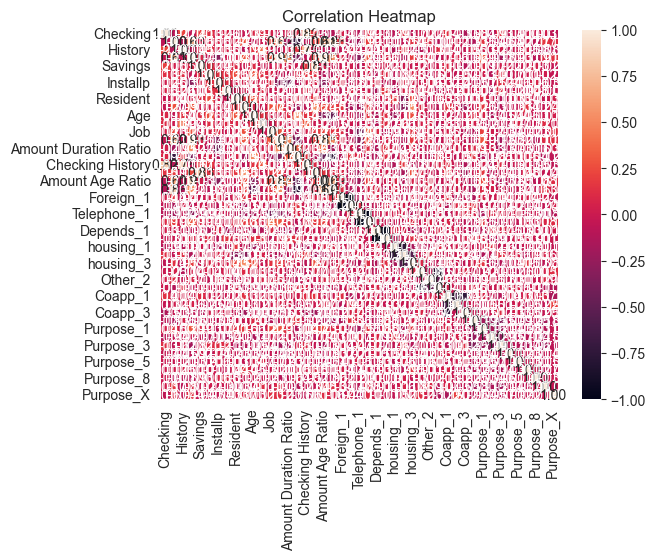

In [631]:
algorithm.heatmap(x_train_ss)

In [632]:
algorithm.data_information(x_train_ss)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Checking,"[1, 3, 4, 2]",int64,4,0,0.0,0
1,Duration,"[1.9999999999999993, 0.24999999999999983, -0.9...",float64,27,0,0.0,0
2,History,"[3, 4, 2, 0, 1]",int64,5,0,0.0,0
3,Amount,"[1.622995134258425, -0.005045954225986578, -0....",float64,687,0,0.0,0
4,Savings,"[1, 3, 5, 2, 4]",int64,5,0,0.0,0
5,Employed,"[5, 2, 3, 4, 1]",int64,5,0,0.0,0
6,Installp,"[3, 2, 1, 4]",int64,4,0,0.0,0
7,marital,"[3, 1, 2, 4]",int64,4,0,0.0,0
8,Resident,"[4, 1, 2, 3]",int64,4,0,0.0,0
9,Property,"[4, 3, 2, 1]",int64,4,0,0.0,0


In [633]:
numberical_anova_ss , categorical_chi2_ss = algorithm.correlation(x_train_ss , y_train , data_frame , numerical_columns , categorical_columns)

In [634]:
numberical_anova_ss

,Feature,F-Score,P-Value
6,Duration Age Ratio,49.844440,3.621232e-12
4,Age Per Duration,39.291614,5.970668e-10
0,Duration,35.200150,4.431319e-09
5,Amount Age Ratio,23.430225,1.555270e-06
1,Amount,16.052718,6.736515e-05
2,Age,15.938607,7.146522e-05
7,Amount Binner,14.014628,1.944160e-04
3,Amount Duration Ratio,0.264801,6.069832e-01


In [635]:
# x_train_ss = x_train_ss.drop(['Amount Duration Ratio'] , axis=1)
# x_test_ss = x_test_ss.drop(['Amount Duration Ratio'] , axis=1)
# x_train_mms = x_train_mms.drop(['Amount Duration Ratio'] , axis=1)
# x_test_mms = x_test_mms.drop(['Amount Duration Ratio'] , axis=1)
# x_train_rs = x_train_rs.drop(['Amount Duration Ratio'] , axis=1)
# x_test_rs = x_test_rs.drop(['Amount Duration Ratio'] , axis=1)

In [636]:
categorical_chi2_ss

,Feature,Chi2 Score,P-Value
10,Checking History,73.530520,9.909205e-18
0,Checking,54.070868,1.933874e-13
1,History,22.644774,1.948896e-06
2,Savings,20.218121,6.909530e-06
7,Property,9.368465,2.207502e-03
30,Purpose_3,9.343012,2.238373e-03
20,housing_3,7.591919,5.863051e-03
21,Other_1,7.552381,5.993084e-03
18,housing_1,7.457830,6.316109e-03
27,Purpose_0,7.025465,8.035858e-03


In [637]:
algorithm.data_information(x_train_ss)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Checking,"[1, 3, 4, 2]",int64,4,0,0.0,0
1,Duration,"[1.9999999999999993, 0.24999999999999983, -0.9...",float64,27,0,0.0,0
2,History,"[3, 4, 2, 0, 1]",int64,5,0,0.0,0
3,Amount,"[1.622995134258425, -0.005045954225986578, -0....",float64,687,0,0.0,0
4,Savings,"[1, 3, 5, 2, 4]",int64,5,0,0.0,0
5,Employed,"[5, 2, 3, 4, 1]",int64,5,0,0.0,0
6,Installp,"[3, 2, 1, 4]",int64,4,0,0.0,0
7,marital,"[3, 1, 2, 4]",int64,4,0,0.0,0
8,Resident,"[4, 1, 2, 3]",int64,4,0,0.0,0
9,Property,"[4, 3, 2, 1]",int64,4,0,0.0,0


## **Best Case**


In [638]:
algorithm.data_information(x_train_ss)

,Names,Values,Data Type,Unique Num,Null Num,Null Percentage,Duplicates
0,Checking,"[1, 3, 4, 2]",int64,4,0,0.0,0
1,Duration,"[1.9999999999999993, 0.24999999999999983, -0.9...",float64,27,0,0.0,0
2,History,"[3, 4, 2, 0, 1]",int64,5,0,0.0,0
3,Amount,"[1.622995134258425, -0.005045954225986578, -0....",float64,687,0,0.0,0
4,Savings,"[1, 3, 5, 2, 4]",int64,5,0,0.0,0
5,Employed,"[5, 2, 3, 4, 1]",int64,5,0,0.0,0
6,Installp,"[3, 2, 1, 4]",int64,4,0,0.0,0
7,marital,"[3, 1, 2, 4]",int64,4,0,0.0,0
8,Resident,"[4, 1, 2, 3]",int64,4,0,0.0,0
9,Property,"[4, 3, 2, 1]",int64,4,0,0.0,0


## **Models**


In [639]:
"""
    Best Logistic Regression : -
        Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
        Train Accuracy: 0.7762 , 0.7612
        Test Accuracy: 0.7900 , 0.7600
"""

# lr_results = algorithm.best_parameters('Logistic Regression' , 'classification' , logistic_regression , LogisticRegression(random_state=42) , x_train_ss , x_test_ss , y_train , y_test)

"\n    Best Logistic Regression : -\n        Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}\n        Train Accuracy: 0.7762 , 0.7612\n        Test Accuracy: 0.7900 , 0.7600\n"

In [654]:
lr_model = LogisticRegression(random_state=42, C=10, penalty='l2', solver= "newton-cg")
algorithm.train_test_evaluate('Standard' , x_train_ss , x_test_ss , y_train , y_test , lr_model)
algorithm.train_test_evaluate('Min Max' , x_train_mms , x_test_mms , y_train , y_test , lr_model)
algorithm.train_test_evaluate('Robust' , x_train_rs , x_test_rs , y_train , y_test , lr_model)

"""
With new Features
Train Accuracy: 0.76875 , 0.7725
Test Accuracy: 0.78 , 0.79
"""

Standard Scaler
Train Accuracy: 0.775
Test Accuracy: 0.785
Min Max Scaler
Train Accuracy: 0.775
Test Accuracy: 0.785
Robust Scaler
Train Accuracy: 0.775
Test Accuracy: 0.785


'\nWith new Features\nTrain Accuracy: 0.76875 , 0.7725\nTest Accuracy: 0.78 , 0.79\n'

In [641]:
"""
    Best K Nearest Neighbors : -
        Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
"""

# knn_results = algorithm.best_parameters('KNN' , 'classification' , k_nearest_neighbors , KNeighborsClassifier() , x_train_ss , x_test_ss , y_train , y_test)

"\n    Best K Nearest Neighbors : -\n        Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}\n"

In [655]:
knn_model = KNeighborsClassifier(n_neighbors=17, metric='manhattan')
algorithm.train_test_evaluate('Standard' , x_train_ss , x_test_ss , y_train , y_test , knn_model)
algorithm.train_test_evaluate('Min Max' , x_train_mms , x_test_mms , y_train , y_test , knn_model)
algorithm.train_test_evaluate('Robust' , x_train_rs , x_test_rs , y_train , y_test , knn_model)
"""
With new Features
Train Accuracy: 0.7825
Test Accuracy: 0.78
"""

Standard Scaler
Train Accuracy: 0.8
Test Accuracy: 0.78
Min Max Scaler
Train Accuracy: 0.8
Test Accuracy: 0.78
Robust Scaler
Train Accuracy: 0.8
Test Accuracy: 0.78


'\nWith new Features\nTrain Accuracy: 0.7825\nTest Accuracy: 0.78\n'

In [656]:
knn_model = KNeighborsClassifier(n_neighbors=17, metric='euclidean')
algorithm.train_test_evaluate('Standard' , x_train_ss , x_test_ss , y_train , y_test , knn_model)
algorithm.train_test_evaluate('Min Max' , x_train_mms , x_test_mms , y_train , y_test , knn_model)
algorithm.train_test_evaluate('Robust' , x_train_rs , x_test_rs , y_train , y_test , knn_model)

"""
With new Features
Train Accuracy: 0.77625
Test Accuracy: 0.775
"""

Standard Scaler
Train Accuracy: 0.79
Test Accuracy: 0.76
Min Max Scaler
Train Accuracy: 0.79
Test Accuracy: 0.76
Robust Scaler
Train Accuracy: 0.79
Test Accuracy: 0.76


'\nWith new Features\nTrain Accuracy: 0.77625\nTest Accuracy: 0.775\n'

In [644]:
"""
    Best Support Vector Machine : -
        Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
"""

# svm_results = algorithm.best_parameters('Support Vector Machine' , 'classification' , support_vector_machine , SVC(random_state=42) , x_train_ss , x_test_ss , y_train , y_test)

"\n    Best Support Vector Machine : -\n        Best Parameters: {'C': 0.1, 'kernel': 'rbf'}\n"

In [657]:
svm_model = SVC(C=1, kernel='rbf', random_state=42)
algorithm.train_test_evaluate('Standard' , x_train_ss , x_test_ss , y_train , y_test , svm_model)
algorithm.train_test_evaluate('Min Max' , x_train_mms , x_test_mms , y_train , y_test , svm_model)
algorithm.train_test_evaluate('Robust' , x_train_rs , x_test_rs , y_train , y_test , svm_model)

"""
With new Features
Train Accuracy: 0.7975
Test Accuracy: 0.78
"""

Standard Scaler
Train Accuracy: 0.7875
Test Accuracy: 0.775
Min Max Scaler
Train Accuracy: 0.7875
Test Accuracy: 0.775
Robust Scaler
Train Accuracy: 0.7875
Test Accuracy: 0.775


'\nWith new Features\nTrain Accuracy: 0.7975\nTest Accuracy: 0.78\n'

In [658]:
svm_model = SVC(C=1, kernel='linear', random_state=42)
algorithm.train_test_evaluate('Standard' , x_train_ss , x_test_ss , y_train , y_test , svm_model)
algorithm.train_test_evaluate('Min Max' , x_train_mms , x_test_mms , y_train , y_test , svm_model)
algorithm.train_test_evaluate('Robust' , x_train_rs , x_test_rs , y_train , y_test , svm_model)

"""
With new Features
Train Accuracy: 0.76875
Test Accuracy: 0.785
"""

Standard Scaler
Train Accuracy: 0.78625
Test Accuracy: 0.775
Min Max Scaler
Train Accuracy: 0.78625
Test Accuracy: 0.775
Robust Scaler
Train Accuracy: 0.78625
Test Accuracy: 0.775


'\nWith new Features\nTrain Accuracy: 0.76875\nTest Accuracy: 0.785\n'

In [647]:
"""
    Best Decision Tree : -
        Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
        Train Accuracy: 0.8000 , 0.8013
        Test Accuracy: 0.7450 , 0.7250
"""

# dt_results = algorithm.best_parameters('Decision Tree' , 'classification' , decision_tree , DecisionTreeClassifier(random_state=42) , x_train_ss , x_test_ss , y_train , y_test)

"\n    Best Decision Tree : -\n        Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}\n        Train Accuracy: 0.8000 , 0.8013\n        Test Accuracy: 0.7450 , 0.7250\n"

In [659]:
dt_model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=7, min_samples_leaf=5, min_samples_split=10)
algorithm.train_test_evaluate('Standard' , x_train_ss , x_test_ss , y_train , y_test , dt_model)
algorithm.train_test_evaluate('Min Max' , x_train_mms , x_test_mms , y_train , y_test , dt_model)
algorithm.train_test_evaluate('Robust' , x_train_rs , x_test_rs , y_train , y_test , dt_model)

"""
With new Features
Train Accuracy: 0.84
Test Accuracy: 0.785
"""

Standard Scaler
Train Accuracy: 0.8475
Test Accuracy: 0.78
Min Max Scaler
Train Accuracy: 0.8475
Test Accuracy: 0.78
Robust Scaler
Train Accuracy: 0.8475
Test Accuracy: 0.78


'\nWith new Features\nTrain Accuracy: 0.84\nTest Accuracy: 0.785\n'

In [649]:
"""
    Best Random Forest : -
    Standard Scaler :
        Best Parameters: Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
        Train Accuracy: 0.9650 , 0.9463
        Test Accuracy: 0.7900 , 0.8000
"""

# rf_results = algorithm.best_parameters('Random Forest' , 'classification' , random_forest , RandomForestClassifier(random_state=42) , x_train_ss , x_test_ss , y_train , y_test)

"\n    Best Random Forest : -\n    Standard Scaler :\n        Best Parameters: Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}\n        Train Accuracy: 0.9650 , 0.9463\n        Test Accuracy: 0.7900 , 0.8000\n"

In [650]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, criterion='gini', max_depth=50, min_samples_leaf=4, min_samples_split=4)
algorithm.train_test_evaluate('Standard' , x_train_ss , x_test_ss , y_train , y_test , rf_model)
algorithm.train_test_evaluate('Min Max' , x_train_mms , x_test_mms , y_train , y_test , rf_model)
algorithm.train_test_evaluate('Robust' , x_train_rs , x_test_rs , y_train , y_test , rf_model)


"""
With new Features
Train Accuracy: 0.9075
Test Accuracy: 0.825
"""

Standard Scaler
Train Accuracy: 0.91
Test Accuracy: 0.78
Min Max Scaler
Train Accuracy: 0.91
Test Accuracy: 0.78
Robust Scaler
Train Accuracy: 0.91
Test Accuracy: 0.78


'\nWith new Features\nTrain Accuracy: 0.9075\nTest Accuracy: 0.825\n'

In [651]:
"""
    Best Gradient Boosting : -
    Standard Scaler :
        Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
        Train Accuracy: 
        Test Accuracy: 
"""

# gb_results = algorithm.best_parameters('XG Boost' , 'classification' , gradient_boosting , XGBClassifier(random_state=42) , x_train_ss , x_test_ss , y_train , y_test)

"\n    Best Gradient Boosting : -\n    Standard Scaler :\n        Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}\n        Train Accuracy: \n        Test Accuracy: \n"

In [652]:
xg_boost_model = xgb.XGBClassifier(random_state=42, learning_rate=0.01, max_depth=3, n_estimators=250 )
algorithm.train_test_evaluate('Standard' , x_train_ss , x_test_ss , y_train , y_test , xg_boost_model)
algorithm.train_test_evaluate('Min Max' , x_train_mms , x_test_mms , y_train , y_test , xg_boost_model)
algorithm.train_test_evaluate('Robust' , x_train_rs , x_test_rs , y_train , y_test , xg_boost_model)


"""
With new Features
Train Accuracy: 0.83375
Test Accuracy: 0.8
"""

Standard Scaler
Train Accuracy: 0.835
Test Accuracy: 0.755
Min Max Scaler
Train Accuracy: 0.835
Test Accuracy: 0.755
Robust Scaler
Train Accuracy: 0.835
Test Accuracy: 0.755


'\nWith new Features\nTrain Accuracy: 0.83375\nTest Accuracy: 0.8\n'

In [653]:
gb_model = GradientBoostingClassifier(random_state=42, learning_rate=0.01, max_depth=3, n_estimators=300 , min_samples_leaf=4 , min_samples_split=2)
algorithm.train_test_evaluate('Standard' , x_train_ss , x_test_ss , y_train , y_test , gb_model)
algorithm.train_test_evaluate('Min Max' , x_train_mms , x_test_mms , y_train , y_test , gb_model)
algorithm.train_test_evaluate('Robust' , x_train_rs , x_test_rs , y_train , y_test , gb_model)
"""
With new Features
Train Accuracy: 0.8375
Test Accuracy: 0.785
"""

Standard Scaler
Train Accuracy: 0.8475
Test Accuracy: 0.78
Min Max Scaler
Train Accuracy: 0.8475
Test Accuracy: 0.78
Robust Scaler
Train Accuracy: 0.8475
Test Accuracy: 0.78


'\nWith new Features\nTrain Accuracy: 0.8375\nTest Accuracy: 0.785\n'

## **Regularization**
